#AUTO PRICE PREDICTION

##Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

#LOAD DATASET

##We load the Auto Price dataset into a DataFrame to begin analysis and modeling.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/auto_imports.csv')
df

3    ?  alfa-romero     gas    std   two  convertible  rwd  front  88.60  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
195 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
196 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
197 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
198 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
199 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   

     ...  130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0    ...  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1    ...  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2    ...  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3    ...  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
4    ...  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  
..   ...  ...   ...   ...   ...   ...  ...   ...  ..  ..    ...  
195  ...  141  mpfi  3.78  3.15   9.5  114  5400  23  28  16845  
196  ...  141  mpfi  3.78  3.15   8.7  160  5300  19  25  19045  
197  ...  173  mpfi  3.58  2.87   8.8  134  5500  18  23  21485  
198  ...  145   idi  3.01  3.40  23.0  106  4800  26  27  22470  
199  ...  141  mpfi  3.78  3.15   9.5  114  5400  19  25  22625  

[200 rows x 26 columns]

In [ ]:
columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',' length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [ ]:
df.columns=columns

In [ ]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            1                 ?  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2                 ?         audi       gas        std   
..         ...               ...          ...       ...        ...   
195         -1                95        volvo       gas        std   
196         -1                95        volvo       gas      turbo   
197         -1                95        volvo       gas        std   
198         -1                95        volvo    diesel      turbo   
199         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
195         four        sedan          rwd           front       109.1  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            152         mpfi  2.68    3.47               9.0        154   
2            109         mpfi  3.19    3.40              10.0        102   
3            136         mpfi  3.19    3.40               8.0        115   
4            136         mpfi  3.19    3.40               8.5        110   
..           ...          ...   ...     ...               ...        ...   
195          141         mpfi  3.78    3.15               9.5        114   
196          141         mpfi  3.78    3.15               8.7        160   
197          173         mpfi  3.58    2.87               8.8        134   
198          145          idi  3.01    3.40              23.0        106   
199          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  16500  
1        5000       19          26  16500  
2        5500       24          30  13950  
3        5500       18          22  17450  
4        5500       19          25  15250  
..        ...      ...         ...    ...  
195      5400       23          28  16845  
196      5300       19          25  19045  
197      5500       18          23  21485  
198      4800       26          27  22470  
199      5400       19          25  22625  

[200 rows x 26 columns]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head(20)

symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           1                 ?  alfa-romero       gas        std   
2           2               164         audi       gas        std   
3           2               164         audi       gas        std   
4           2                 ?         audi       gas        std   
5           1               158         audi       gas        std   
6           1                 ?         audi       gas        std   
7           1               158         audi       gas      turbo   
8           2               192          bmw       gas        std   
9           0               192          bmw       gas        std   
10          0               188          bmw       gas        std   
11          0               188          bmw       gas        std   
12          1                 ?          bmw       gas        std   
13          0                 ?          bmw       gas        std   
14          0                 ?          bmw       gas        std   
15          0                 ?          bmw       gas        std   
16          2               121    chevrolet       gas        std   
17          1                98    chevrolet       gas        std   
18          0                81    chevrolet       gas        std   
19          1               118        dodge       gas        std   

   num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0           two  convertible          rwd           front        88.6  ...   
1           two    hatchback          rwd           front        94.5  ...   
2          four        sedan          fwd           front        99.8  ...   
3          four        sedan          4wd           front        99.4  ...   
4           two        sedan          fwd           front        99.8  ...   
5          four        sedan          fwd           front       105.8  ...   
6          four        wagon          fwd           front       105.8  ...   
7          four        sedan          fwd           front       105.8  ...   
8           two        sedan          rwd           front       101.2  ...   
9          four        sedan          rwd           front       101.2  ...   
10          two        sedan          rwd           front       101.2  ...   
11         four        sedan          rwd           front       101.2  ...   
12         four        sedan          rwd           front       103.5  ...   
13         four        sedan          rwd           front       103.5  ...   
14          two        sedan          rwd           front       103.5  ...   
15         four        sedan          rwd           front       110.0  ...   
16          two    hatchback          fwd           front        88.4  ...   
17          two    hatchback          fwd           front        94.5  ...   
18         four        sedan          fwd           front        94.5  ...   
19          two    hatchback          fwd           front        93.7  ...   

    engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0           130         mpfi  3.47    2.68              9.00        111   
1           152         mpfi  2.68    3.47              9.00        154   
2           109         mpfi  3.19    3.40             10.00        102   
3           136         mpfi  3.19    3.40              8.00        115   
4           136         mpfi  3.19    3.40              8.50        110   
5           136         mpfi  3.19    3.40              8.50        110   
6           136         mpfi  3.19    3.40              8.50        110   
7           131         mpfi  3.13    3.40              8.30        140   
8           108         mpfi  3.50    2.80              8.80        101   
9           108         mpfi  3.50    2.80              8.80        101   
10          164         mpfi  3.31    3.19              9.00        121   
11          164

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10   length            200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df

symboling normalized-losses           make fuel-type aspiration  \
0            3               NaN    alfa-romero       gas        std   
1            1               NaN    alfa-romero       gas        std   
2            2               164           audi       gas        std   
3            2               164           audi       gas        std   
4            2               NaN           audi       gas        std   
5            1               158           audi       gas        std   
6            1               NaN           audi       gas        std   
7            1               158           audi       gas      turbo   
8            2               192            bmw       gas        std   
9            0               192            bmw       gas        std   
10           0               188            bmw       gas        std   
11           0               188            bmw       gas        std   
12           1               NaN            bmw       gas        std   
13           0               NaN            bmw       gas        std   
14           0               NaN            bmw       gas        std   
15           0               NaN            bmw       gas        std   
16           2               121      chevrolet       gas        std   
17           1                98      chevrolet       gas        std   
18           0                81      chevrolet       gas        std   
19           1               118          dodge       gas        std   
20           1               118          dodge       gas        std   
21           1               118          dodge       gas      turbo   
22           1               148          dodge       gas        std   
23           1               148          dodge       gas        std   
24           1               148          dodge       gas        std   
25           1               148          dodge       gas      turbo   
26          -1               110          dodge       gas        std   
27           3               145          dodge       gas      turbo   
28           2               137          honda       gas        std   
29           2               137          honda       gas        std   
30           1               101          honda       gas        std   
31           1               101          honda       gas        std   
32           1               101          honda       gas        std   
33           0               110          honda       gas        std   
34           0                78          honda       gas        std   
35           0               106          honda       gas        std   
36           0               106          honda       gas        std   
37           0                85          honda       gas        std   
38           0                85          honda       gas        std   
39           0                85          honda       gas        std   
40           1               107          honda       gas        std   
41           0               NaN          isuzu       gas        std   
42           2               NaN          isuzu       gas        std   
43           0               145         jaguar       gas        std   
44           0               NaN         jaguar       gas        std   
45           0               NaN         jaguar       gas        std   
46           1               104          mazda       gas        std   
47           1               104          mazda       gas        std   
48           1               104          mazda       gas        std   
49           1               113          mazda       gas        std   
50           1               113          mazda       gas        std   
51           3               150          mazda       gas        std   
52           3               150          mazda       gas        std   
53           3               150          mazda       gas        std   
54           3               150          maz

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10   length            200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
 length               0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
df.sample()

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
50          1               113  mazda       gas        std         four   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
50      sedan          fwd           front        93.1  ...           91   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
50         2bbl  3.08    3.15               9.0         68      5000       31   

   highway-mpg price  
50          38  7395  

[1 rows x 26 columns]

In [ ]:
columns=df.columns
for col in columns:
  print(f'{col} : {df[col].nunique()}')

symboling : 6
normalized-losses : 51
make : 22
fuel-type : 2
aspiration : 2
num-of-doors : 2
body-style : 5
drive-wheels : 3
engine-location : 2
wheel-base : 52
 length : 73
width : 43
height : 49
curb-weight : 169
engine-type : 6
num-of-cylinders : 7
engine-size : 43
fuel-system : 8
bore : 38
stroke : 36
compression-ratio : 32
horsepower : 58
peak-rpm : 22
city-mpg : 29
highway-mpg : 30
price : 185


In [ ]:
df.shape

(200, 26)

In [ ]:
df.select_dtypes(include='object').columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

In [ ]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       2
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [ ]:
df['fuel-type'].value_counts()

fuel-type
gas       180
diesel     20
Name: count, dtype: int64

In [ ]:
df['aspiration'].value_counts()

aspiration
std      164
turbo     36
Name: count, dtype: int64

In [ ]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      85
Name: count, dtype: int64

In [ ]:
df['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: count, dtype: int64

In [ ]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [ ]:
df['engine-location'].value_counts()

engine-location
front    197
rear       3
Name: count, dtype: int64

In [ ]:
df['engine-type'].value_counts()

engine-type
ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: count, dtype: int64

In [ ]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      156
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: count, dtype: int64

In [ ]:
df['fuel-system'].value_counts()

fuel-system
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

#Handling the Missing Values

In [ ]:
col=df.columns
for col_name in col:
  if(df[col_name].dtypes=='object'):
    df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
  else:
    df[col_name]=df[col_name].fillna(df[col_name].mean())

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
 length              0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['normalized-losses']=df['normalized-losses'].astype('int64')
df['bore']=df['bore'].astype('float64')
df['stroke']=df['stroke'].astype('float64')
df['horsepower']=df['horsepower'].astype('int64')
df['peak-rpm']=df['peak-rpm'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10   length            200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  200.000000         200.000000  200.000000  200.000000  200.000000   
mean     0.830000         129.020000   98.848000  174.228000   65.898000   
std      1.248557          35.419377    6.038261   12.347132    2.102904   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         100.250000   94.500000  166.675000   64.175000   
50%      1.000000         128.000000   97.000000  173.200000   65.500000   
75%      2.000000         161.000000  102.400000  183.500000   66.675000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  200.000000   200.000000   200.000000  200.000000  200.000000   
mean    53.791500  2555.705000   126.860000    3.335800    3.262650   
std      2.428449   518.594552    41.650501    0.271629    0.314792   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2163.000000    97.750000    3.150000    3.117500   
50%     54.100000  2414.000000   119.500000    3.310000    3.290000   
75%     55.525000  2928.250000   142.000000    3.602500    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         200.000000  200.000000   200.000000  200.000000   200.000000   
mean           10.170100  103.005000  5115.000000   25.200000    30.705000   
std             4.014163   37.621161   480.289904    6.432487     6.827227   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.575000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5150.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  262.000000  6600.000000   49.000000    54.000000   

              price  
count    200.000000  
mean   13205.690000  
std     7966.982558  
min     5118.000000  
25%     7775.000000  
50%    10270.000000  
75%    16500.750000  
max    45400.000000

In [ ]:
df.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      200       200        200          200        200          200   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       180        164          115         94          118   

       engine-location engine-type num-of-cylinders fuel-system  
count              200         200              200         200  
unique               2           6                7           8  
top              front         ohc             four        mpfi  
freq               197         145              156          91

#Exploratory Data Analysis

##EDA  is the process of examining and understanding a dataset before building any model.

In [ ]:
col1=df.select_dtypes(exclude='object')

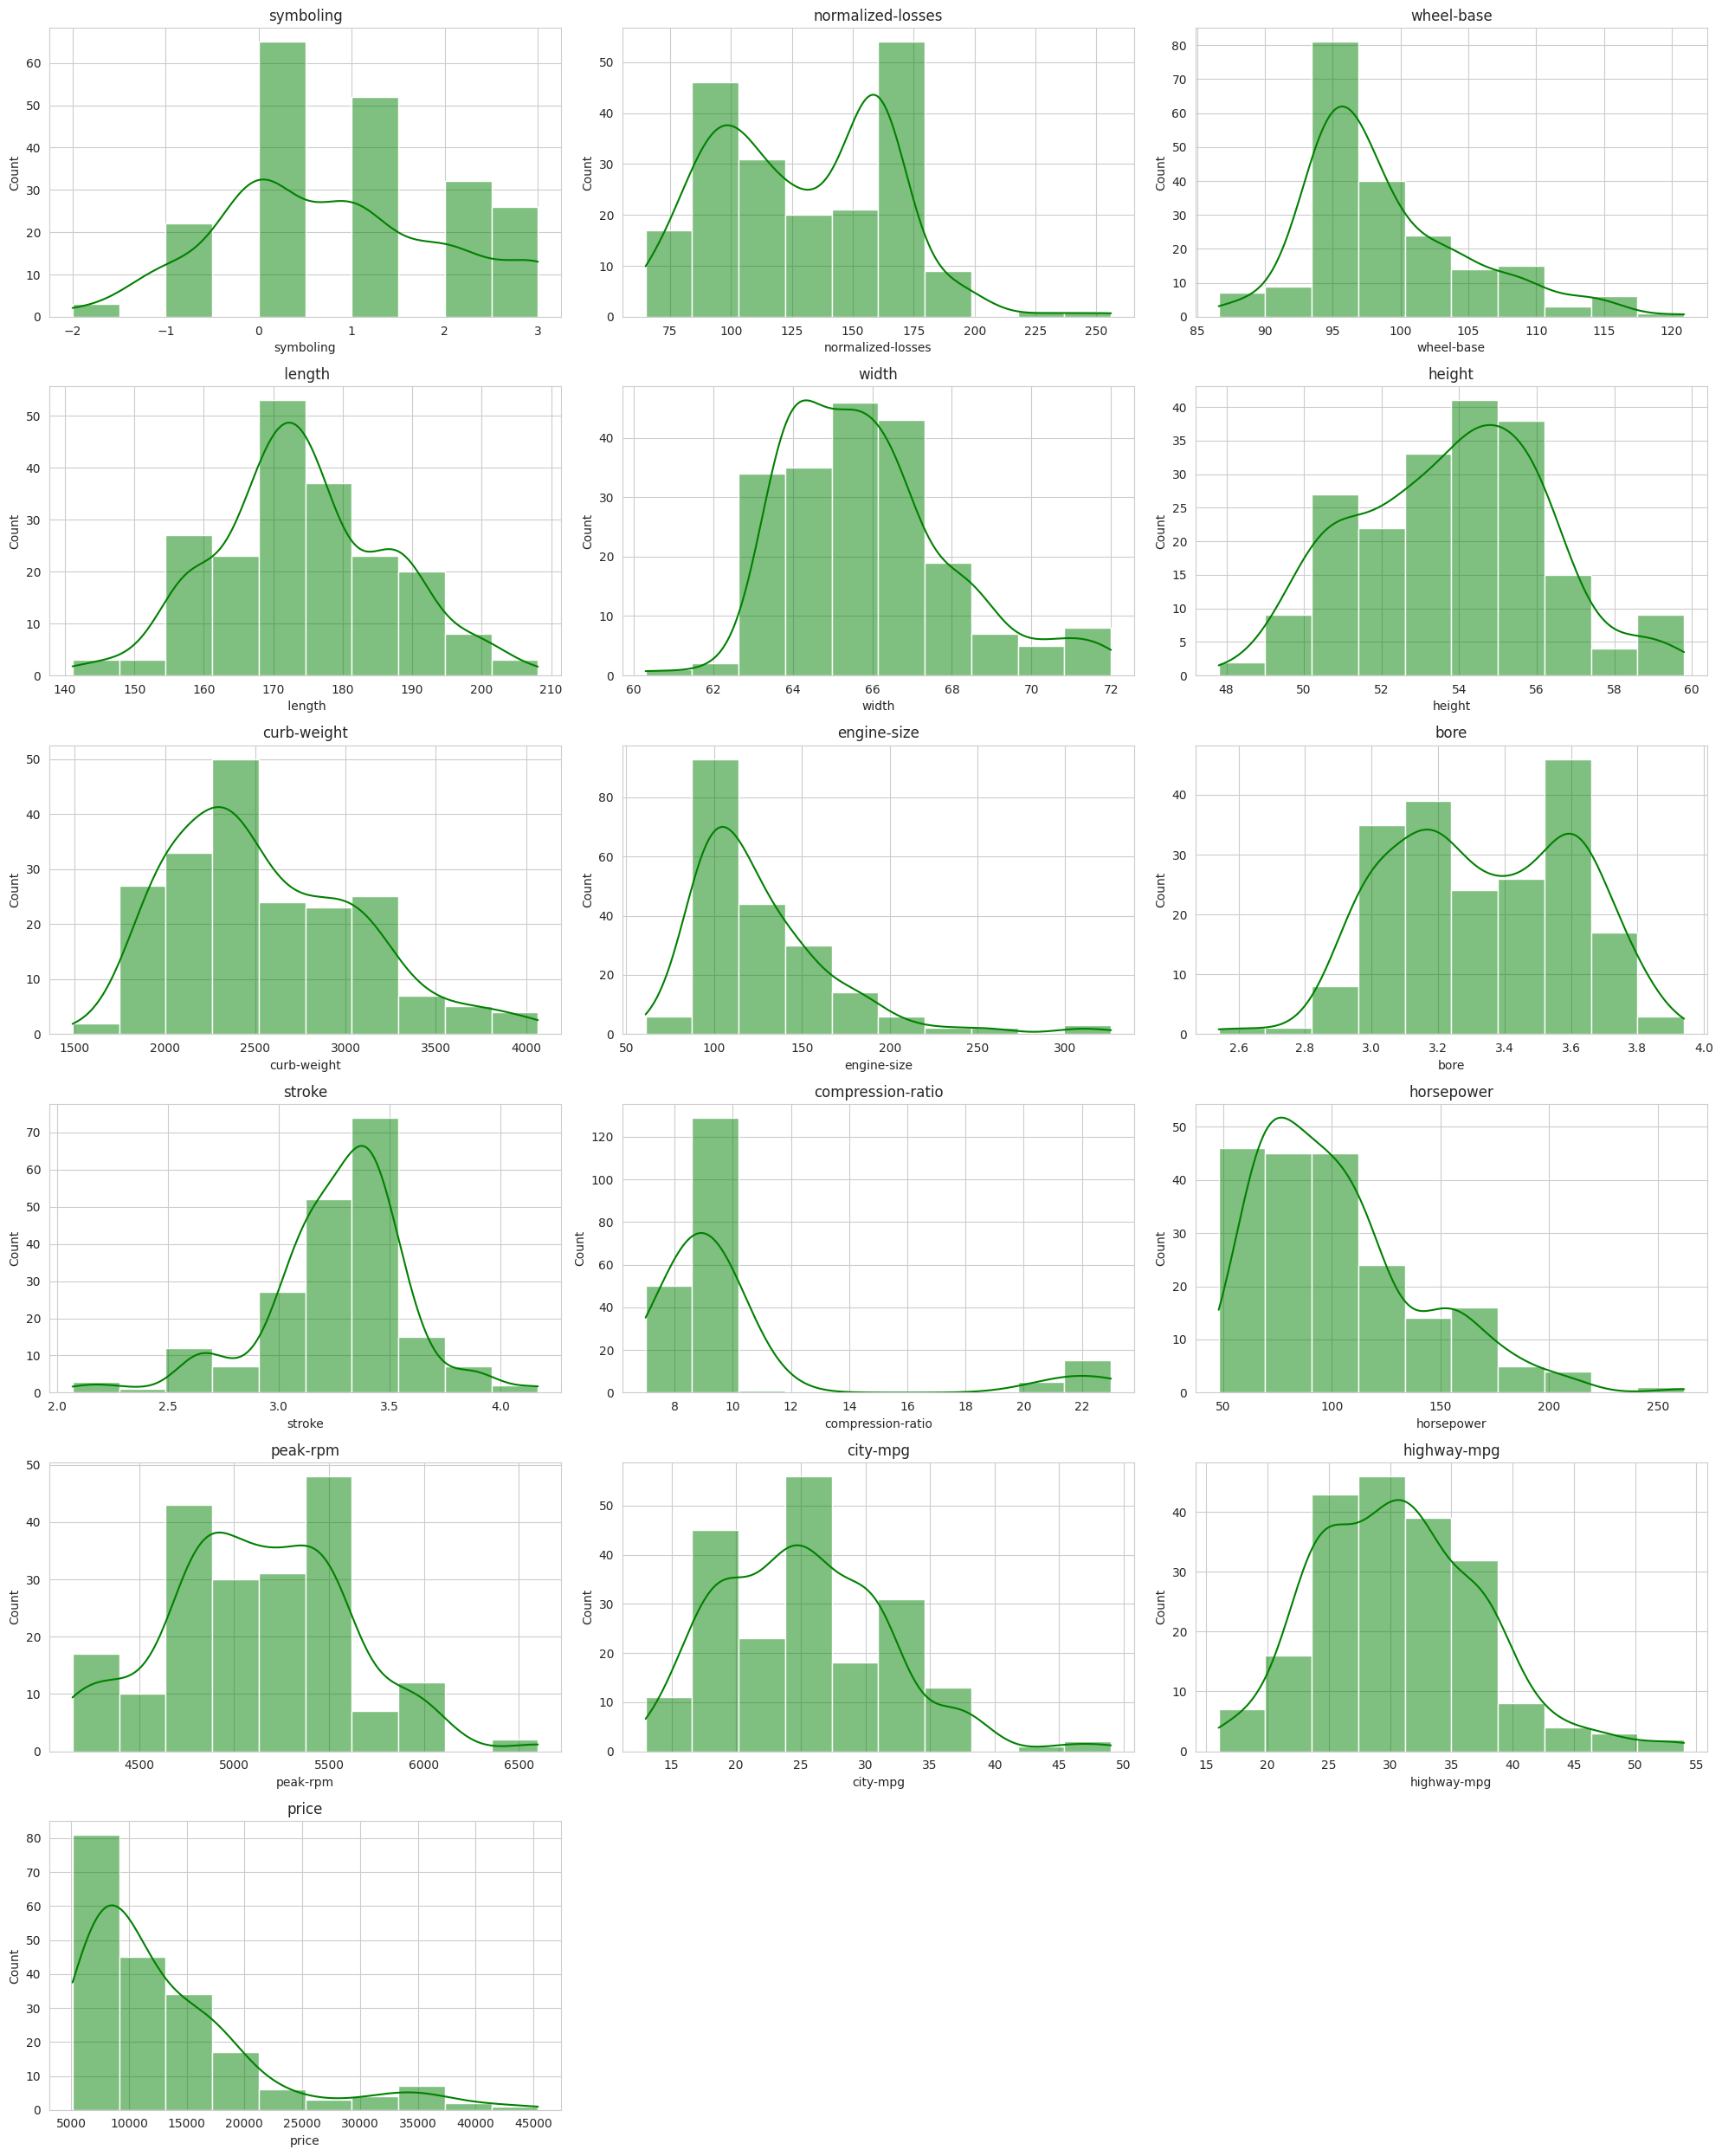

In [ ]:
plt.figure(figsize=(20,25))
sns.set_style('whitegrid')
pos=1
for i in col1:
  plt.subplot(6,3,pos)
  sns.histplot(x=df[i],data=df,bins=10,kde=True,color='green')
  plt.title(i)
  pos=pos+1
plt.tight_layout()
plt.show()

In [ ]:
col2=df.select_dtypes(include='object')

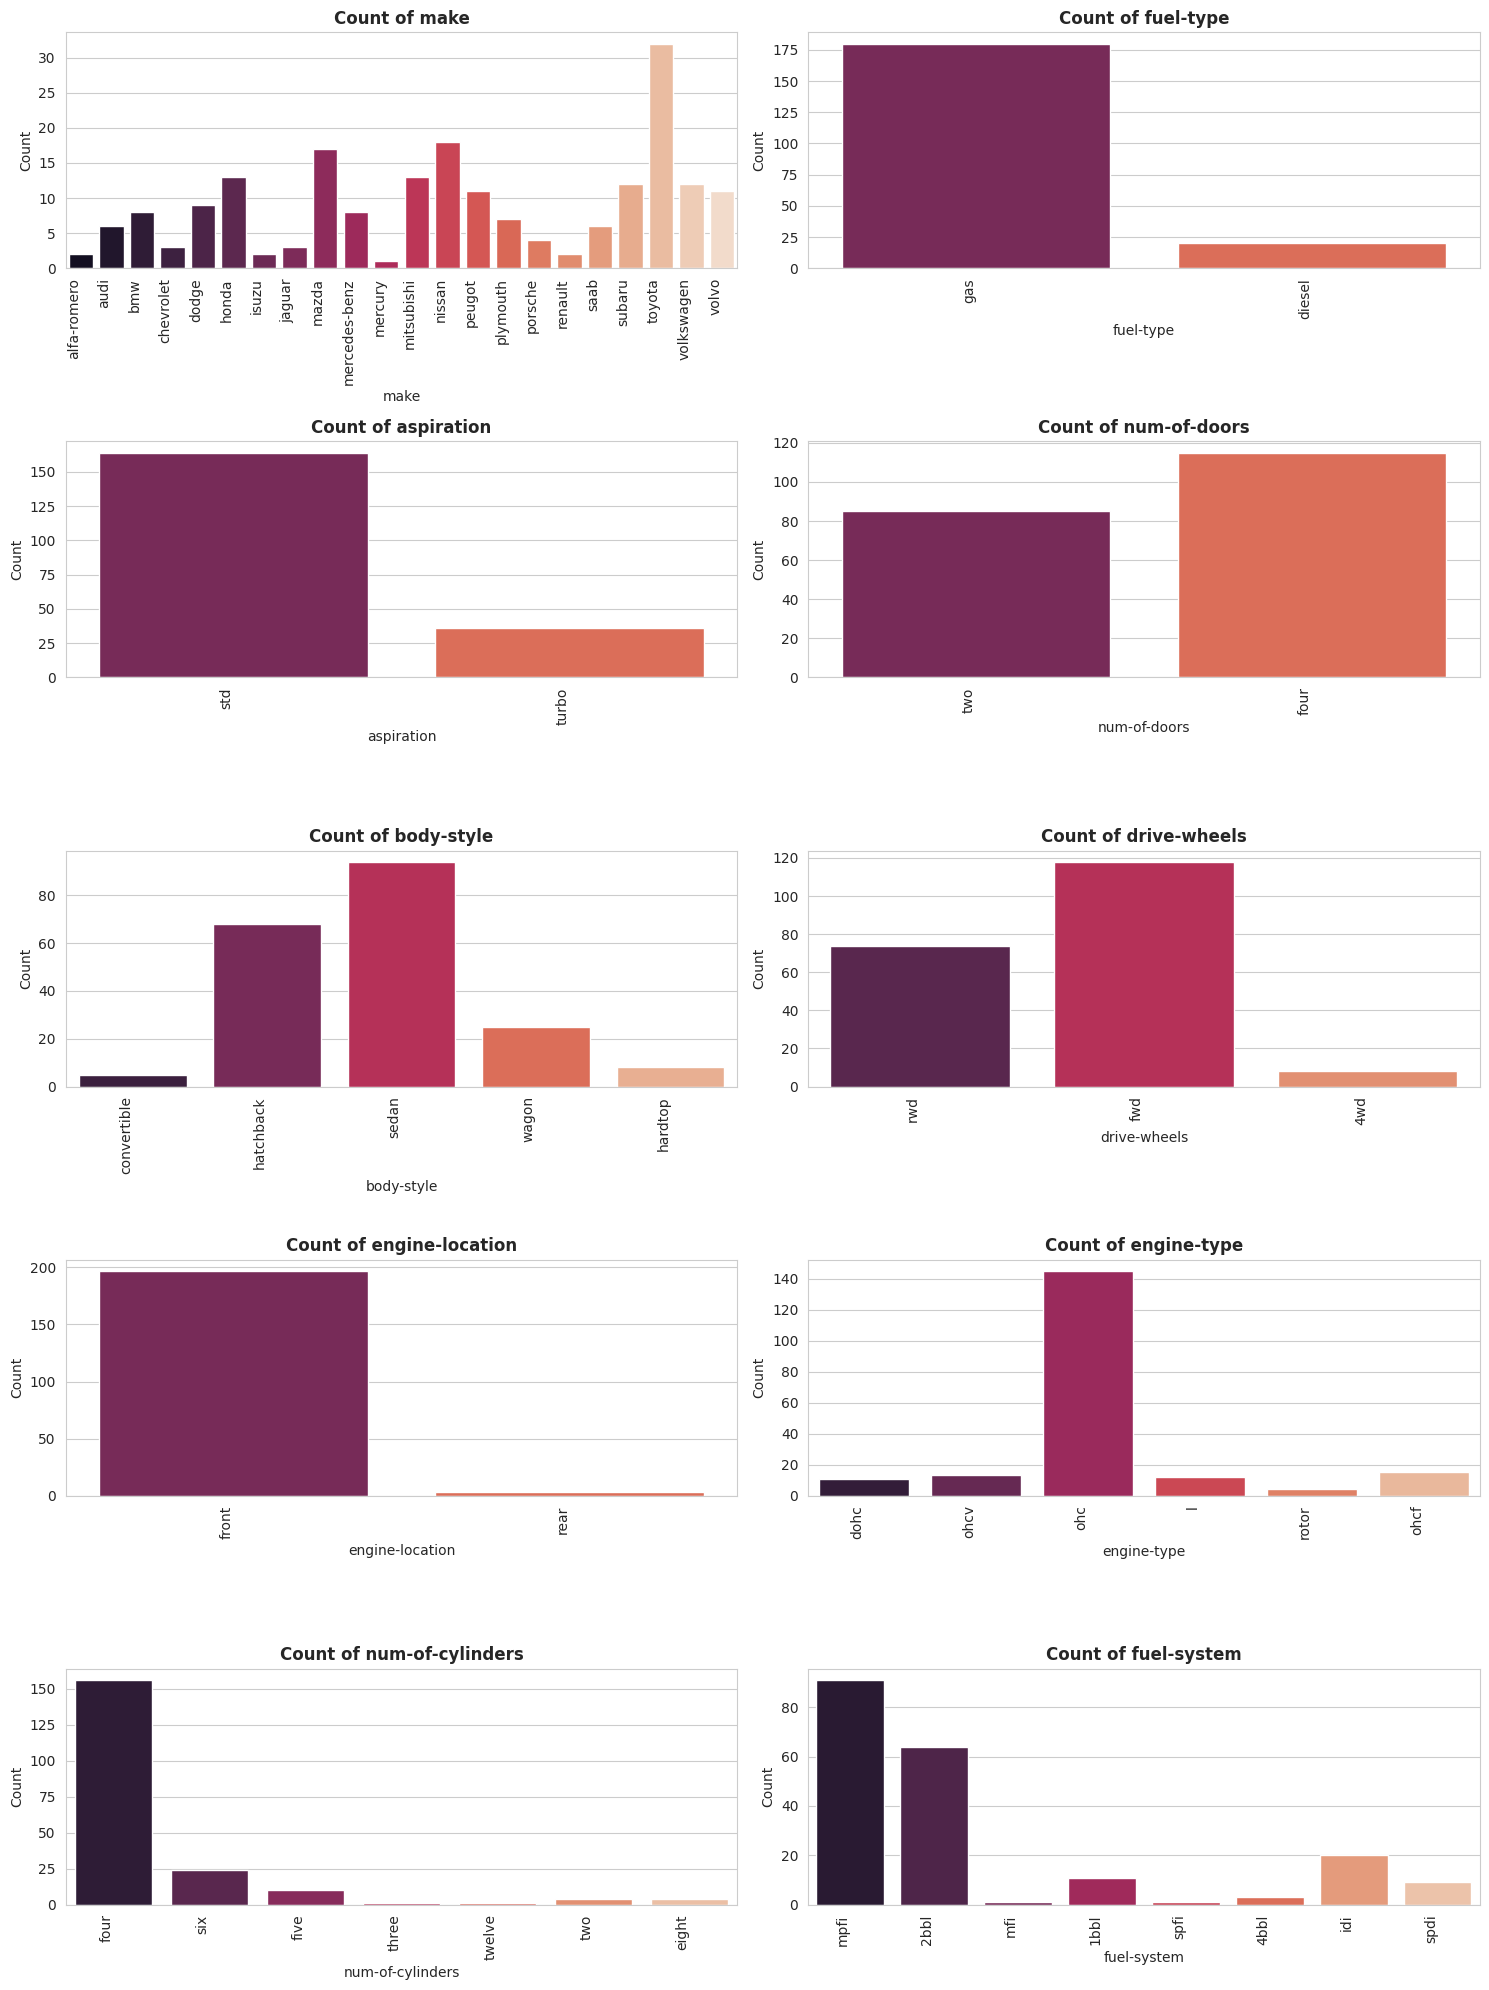

In [ ]:
plt.figure(figsize=(15,20))
pos=1
for i in col2:
  plt.subplot(5,2,pos)
  sns.countplot(x=df[i],data=df,palette="rocket",hue=df[i])
  plt.xticks(rotation=90, ha='right')
  plt.xlabel(i, fontsize=10)
  plt.ylabel("Count", fontsize=10)
  plt.title(f"Count of {i}", fontsize=12, fontweight='bold')
  pos=pos+1
plt.tight_layout()
plt.show()

<Figure size 1500x2000 with 0 Axes>

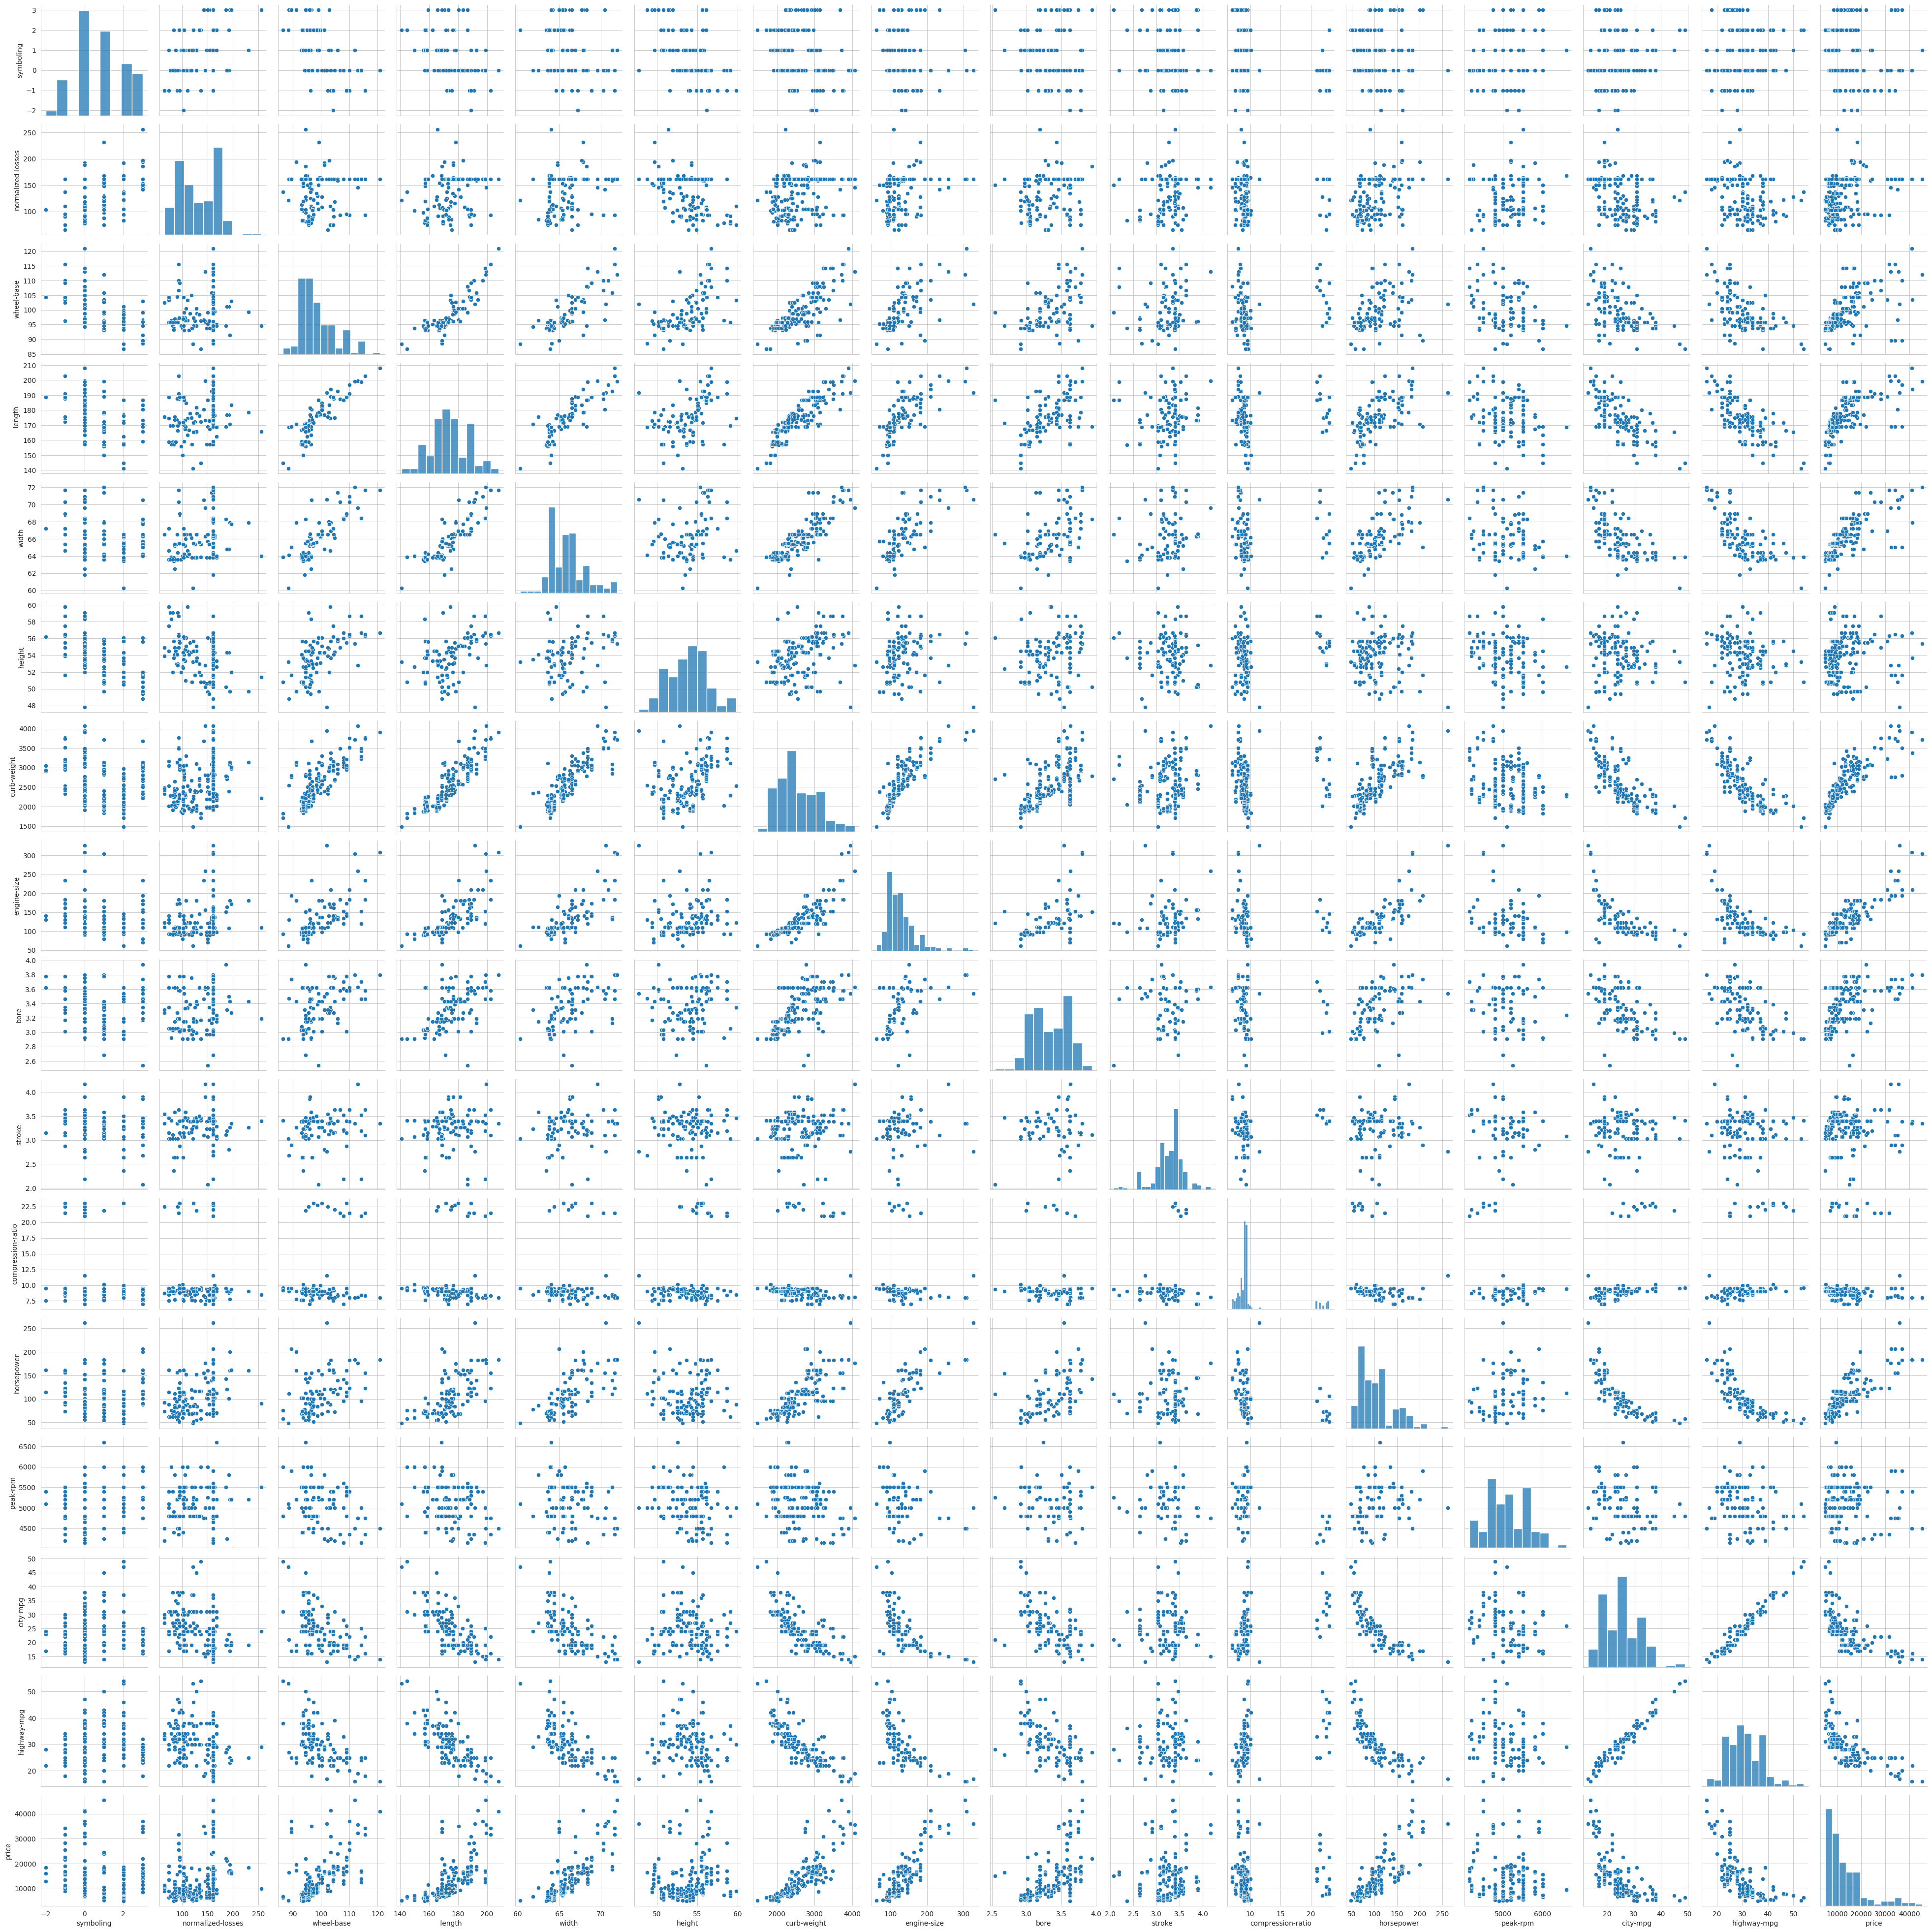

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(df)
plt.show()

#To find the Outliers

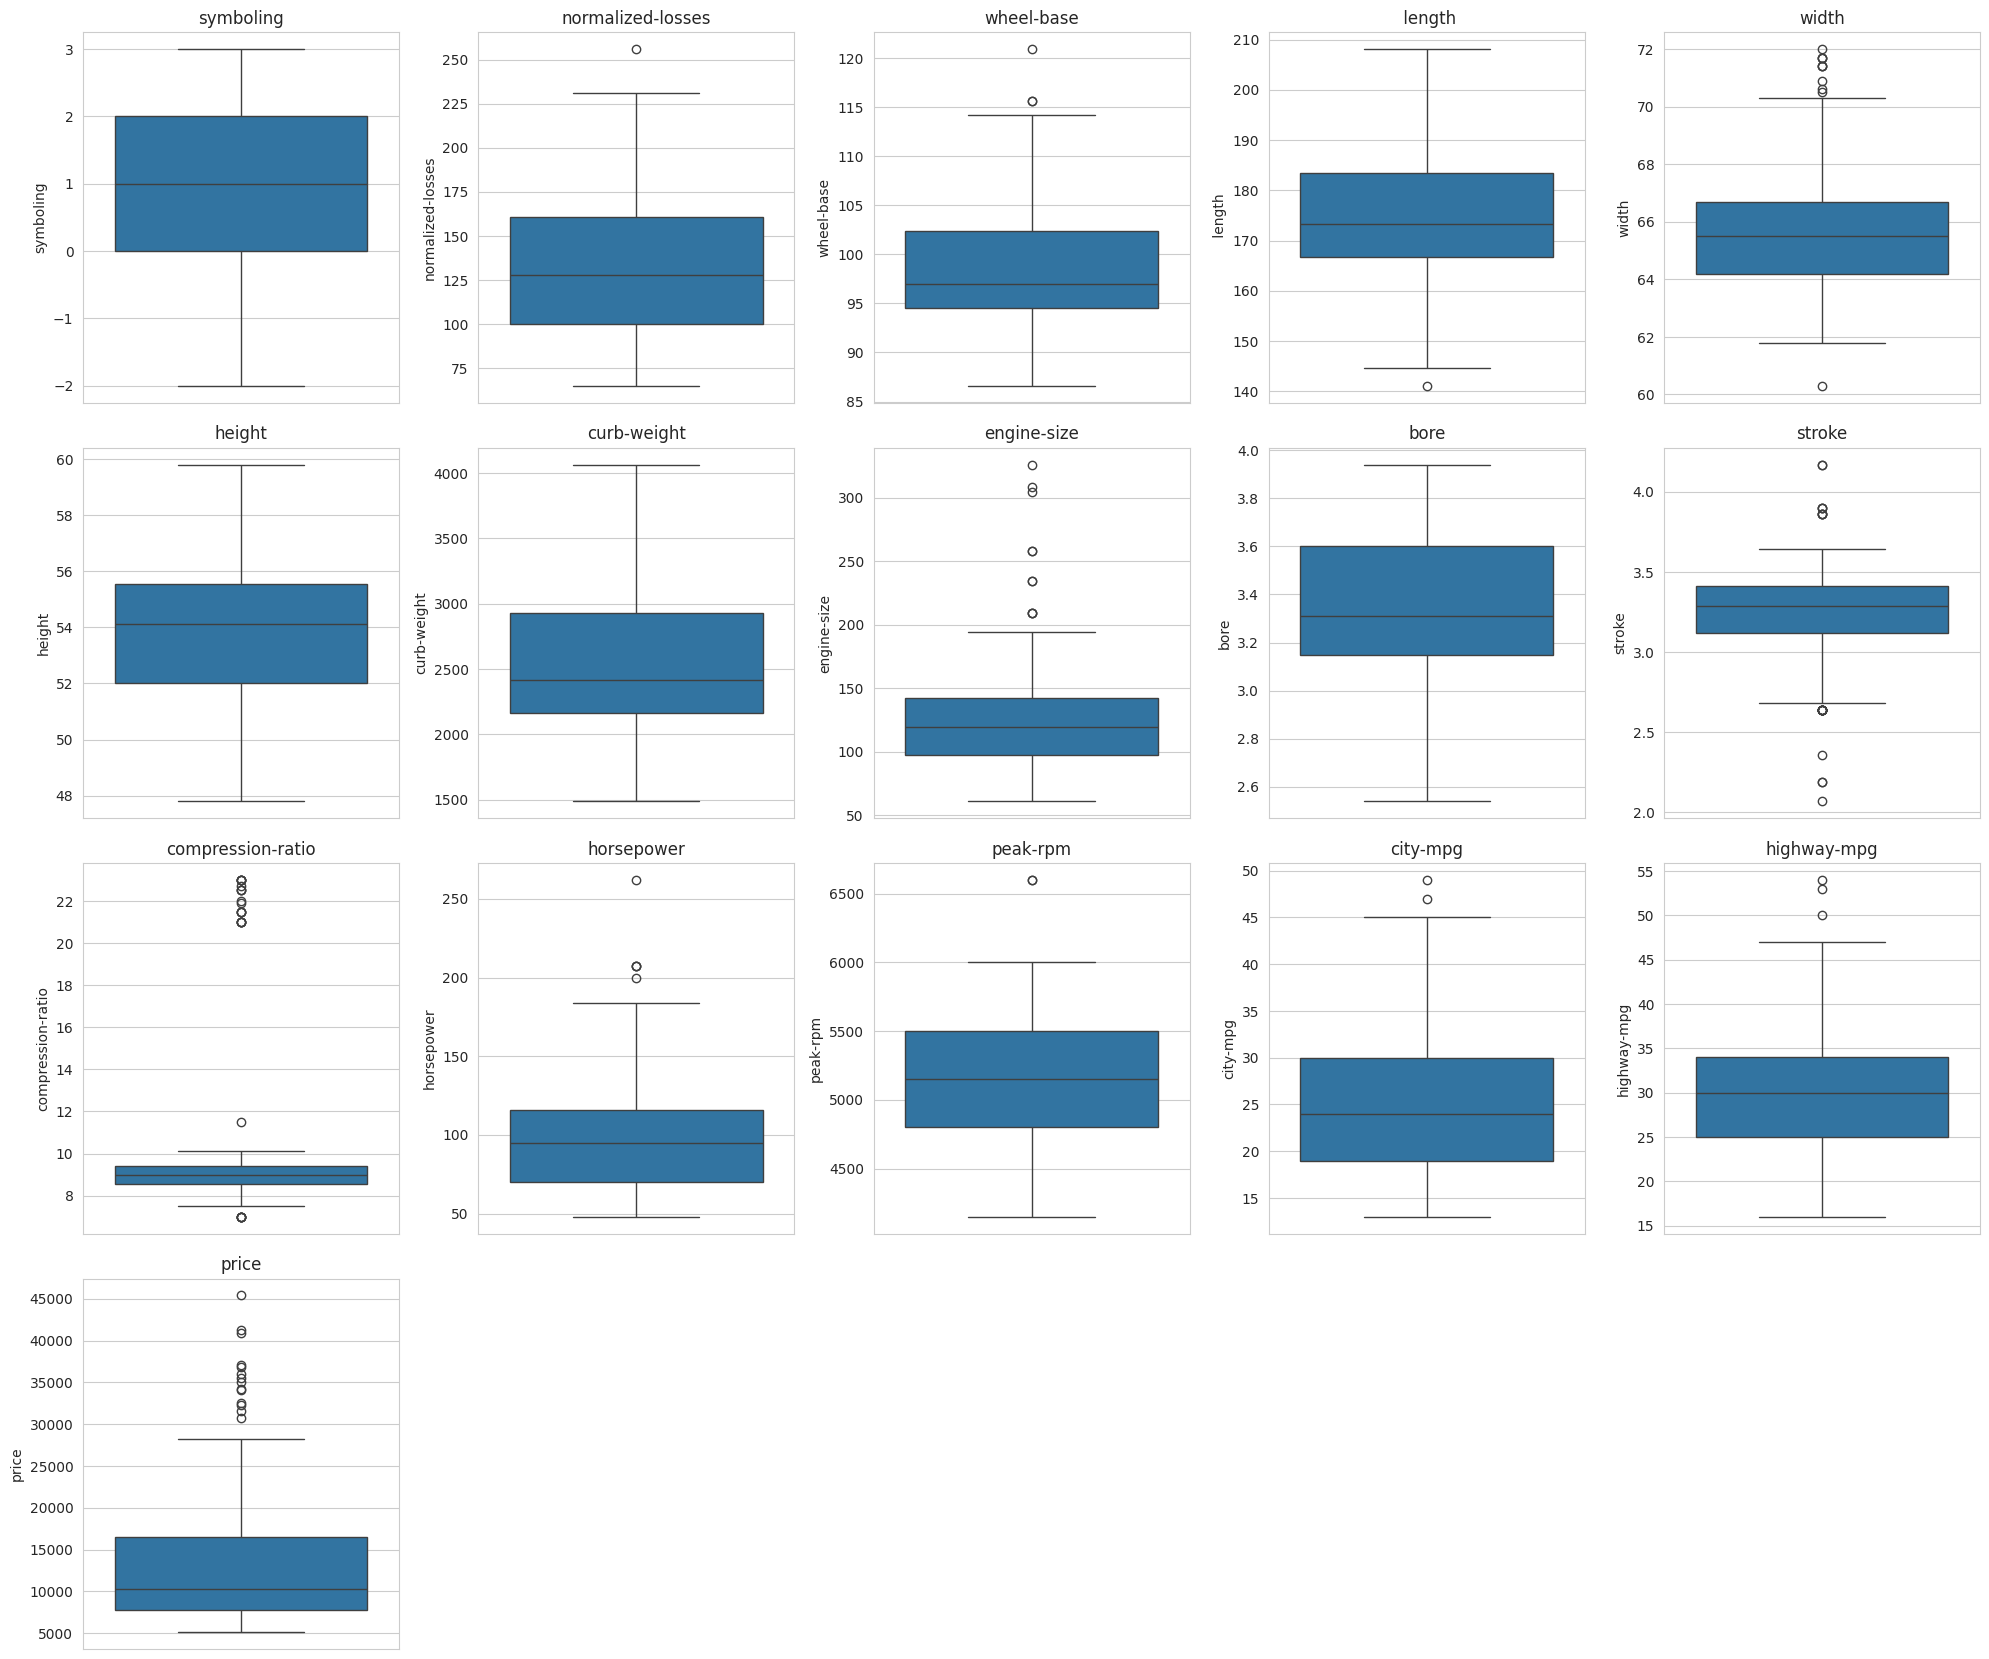

In [ ]:
plt.figure(figsize=(20,25))
pos=1
for i in col1:
  plt.subplot(6,5,pos)
  sns.boxplot(df[i])
  plt.title(i)
  pos=pos+1
plt.tight_layout()
plt.show()

#Handling the Outliers

##When the outliers occurs in the dataset if we don't handle the outliers it may affect the prediction ,it doesn't give correct prediction overfitting occurs

In [ ]:
def remove_outliers(df):
  df_clean = df.copy()
  numeric_columns=df_clean.select_dtypes(include='number').columns
  for col in numeric_columns:
    Q1=df_clean[col].quantile(0.25)
    Q3=df_clean[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df_clean=df_clean[(df_clean[col]>=lower_bound)&(df_clean[col]<=upper_bound)]
  print(f"Rows before: {df.shape[0]} --> After: {df_clean.shape[0]}")
  return df_clean

df_cleaned = remove_outliers(df)

Rows before: 200 --> After: 125


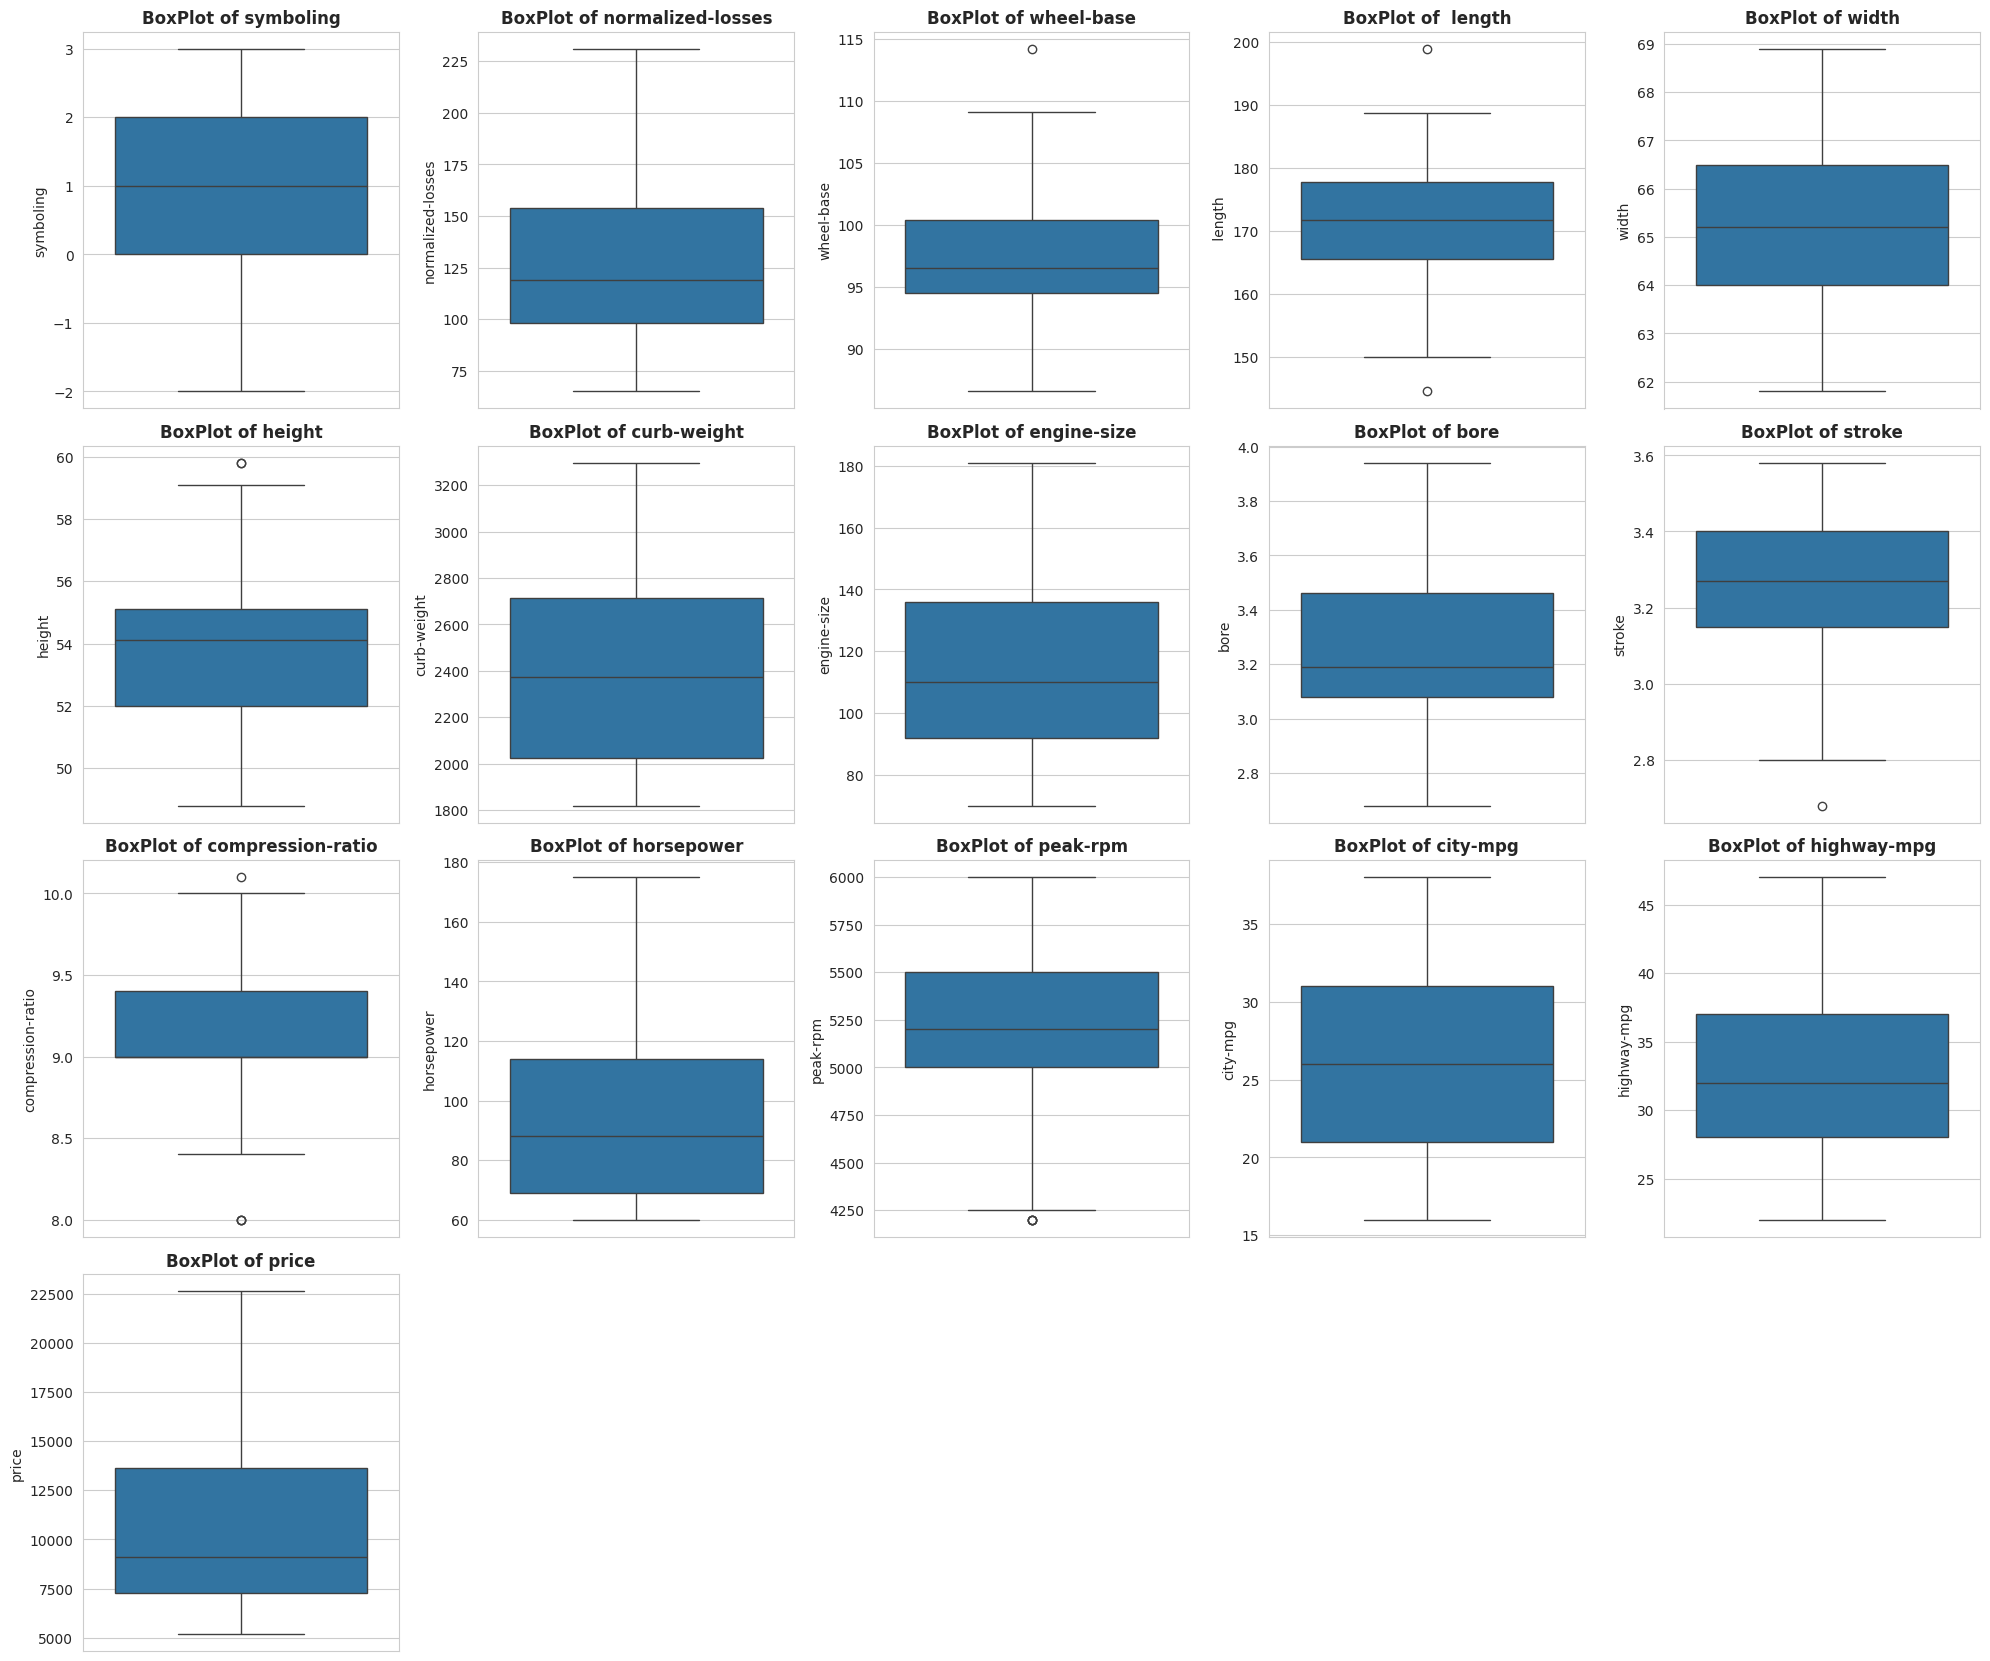

In [ ]:
numeric_columns_cleaned = df_cleaned.select_dtypes(include='number').columns
plt.figure(figsize=(20,25))
pos=1
for col in numeric_columns_cleaned:
  plt.subplot(6,5,pos)
  sns.boxplot(df_cleaned[col])
  plt.title(f"BoxPlot of {col}",fontsize=12, fontweight='bold')
  pos=pos+1
plt.tight_layout()
plt.show()

#Feature Scaling

#Encoding and Scaling

In [ ]:
col2=df.select_dtypes(include='object').columns
col2

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col2:
  df[i]=le.fit_transform(df[i])

In [ ]:
df

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3                161     0          1           0             1   
1            1                161     0          1           0             1   
2            2                164     1          1           0             0   
3            2                164     1          1           0             0   
4            2                161     1          1           0             1   
5            1                158     1          1           0             0   
6            1                161     1          1           0             0   
7            1                158     1          1           1             0   
8            2                192     2          1           0             1   
9            0                192     2          1           0             0   
10           0                188     2          1           0             1   
11           0                188     2          1           0             0   
12           1                161     2          1           0             0   
13           0                161     2          1           0             0   
14           0                161     2          1           0             1   
15           0                161     2          1           0             0   
16           2                121     3          1           0             1   
17           1                 98     3          1           0             1   
18           0                 81     3          1           0             0   
19           1                118     4          1           0             1   
20           1                118     4          1           0             1   
21           1                118     4          1           1             1   
22           1                148     4          1           0             0   
23           1                148     4          1           0             0   
24           1                148     4          1           0             0   
25           1                148     4          1           1             0   
26          -1                110     4          1           0             0   
27           3                145     4          1           1             1   
28           2                137     5          1           0             1   
29           2                137     5          1           0             1   
30           1                101     5          1           0             1   
31           1                101     5          1           0             1   
32           1                101     5          1           0             1   
33           0                110     5          1           0             0   
34           0                 78     5          1           0             0   
35           0                106     5          1           0             1   
36           0                106     5          1           0             1   
37           0                 85     5          1           0             0   
38           0                 85     5          1           0             0   
39           0                 85     5          1           0             0   
40           1                107     5          1           0             1   
41           0                161     6          1           0             0   
42           2                161     6          1           0             1   
43           0                145     7          1           0             0   
44           0                161     7          1           0             0   
45           0                161     7          1           0             1   
46           1                104     8          1           0             1   
47           1                104     8          1           0             1   
48           1                104     8          1           0             1   
49   

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in numerical_cols if col != 'price']
target_col = 'price'

feature_scaler = StandardScaler()
y_scaler = StandardScaler()

df[feature_cols] = feature_scaler.fit_transform(df[feature_cols])
df[target_col] = y_scaler.fit_transform(df[[target_col]])

In [ ]:
df

symboling  normalized-losses      make  fuel-type  aspiration  \
0     1.742368           0.905161 -1.996136   0.333333   -0.468521   
1     0.136499           0.905161 -1.996136   0.333333   -0.468521   
2     0.939433           0.990073 -1.834636   0.333333   -0.468521   
3     0.939433           0.990073 -1.834636   0.333333   -0.468521   
4     0.939433           0.905161 -1.834636   0.333333   -0.468521   
5     0.136499           0.820249 -1.834636   0.333333   -0.468521   
6     0.136499           0.905161 -1.834636   0.333333   -0.468521   
7     0.136499           0.820249 -1.834636   0.333333    2.134375   
8     0.939433           1.782585 -1.673137   0.333333   -0.468521   
9    -0.666436           1.782585 -1.673137   0.333333   -0.468521   
10   -0.666436           1.669369 -1.673137   0.333333   -0.468521   
11   -0.666436           1.669369 -1.673137   0.333333   -0.468521   
12    0.136499           0.905161 -1.673137   0.333333   -0.468521   
13   -0.666436           0.905161 -1.673137   0.333333   -0.468521   
14   -0.666436           0.905161 -1.673137   0.333333   -0.468521   
15   -0.666436           0.905161 -1.673137   0.333333   -0.468521   
16    0.939433          -0.226998 -1.511637   0.333333   -0.468521   
17    0.136499          -0.877990 -1.511637   0.333333   -0.468521   
18   -0.666436          -1.359157 -1.511637   0.333333   -0.468521   
19    0.136499          -0.311910 -1.350137   0.333333   -0.468521   
20    0.136499          -0.311910 -1.350137   0.333333   -0.468521   
21    0.136499          -0.311910 -1.350137   0.333333    2.134375   
22    0.136499           0.537210 -1.350137   0.333333   -0.468521   
23    0.136499           0.537210 -1.350137   0.333333   -0.468521   
24    0.136499           0.537210 -1.350137   0.333333   -0.468521   
25    0.136499           0.537210 -1.350137   0.333333    2.134375   
26   -1.469370          -0.538342 -1.350137   0.333333   -0.468521   
27    1.742368           0.452298 -1.350137   0.333333    2.134375   
28    0.939433           0.225866 -1.188638   0.333333   -0.468521   
29    0.939433           0.225866 -1.188638   0.333333   -0.468521   
30    0.136499          -0.793078 -1.188638   0.333333   -0.468521   
31    0.136499          -0.793078 -1.188638   0.333333   -0.468521   
32    0.136499          -0.793078 -1.188638   0.333333   -0.468521   
33   -0.666436          -0.538342 -1.188638   0.333333   -0.468521   
34   -0.666436          -1.444069 -1.188638   0.333333   -0.468521   
35   -0.666436          -0.651558 -1.188638   0.333333   -0.468521   
36   -0.666436          -0.651558 -1.188638   0.333333   -0.468521   
37   -0.666436          -1.245941 -1.188638   0.333333   -0.468521   
38   -0.666436          -1.245941 -1.188638   0.333333   -0.468521   
39   -0.666436          -1.245941 -1.188638   0.333333   -0.468521   
40    0.136499          -0.623254 -1.188638   0.333333   -0.468521   
41   -0.666436           0.905161 -1.027138   0.333333   -0.468521   
42    0.939433           0.905161 -1.027138   0.333333   -0.468521   
43   -0.666436           0.452298 -0.865638   0.333333   -0.468521   
44   -0.666436           0.905161 -0.865638   0.333333   -0.468521   
45   -0.666436           0.905161 -0.865638   0.333333   -0.468521   
46    0.136499          -0.708166 -0.704139   0.333333   -0.468521   
47    0.136499          -0.708166 -0.704139   0.333333   -0.468521   
48    0.136499          -0.708166 -0.704139   0.333333   -0.468521   
49    0.136499          -0.453430 -0.704139   0.333333   -0.468521   
50    0.136499          -0.453430 -0.704139   0.333333   -0.468521   
51    1.742368           0.593818 -0.704139   0.333333   -0.468521   
52    1.742368           0.593818 -0.704139   0.333333   -0.468521   
53    1.742368           0.593818 -0.704139   0.333333   -0.468521   
54    1.742368           0.593818 -0.704139   0.333333   -0.468521   
55    0.136499          -0.000566 -0.704139   0.333333   -0.468521   
56   -0.666436 

In [ ]:
res=df.corr()
res

symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.452557 -0.114606   0.195381   
normalized-losses   0.452557           1.000000 -0.304787   0.066231   
make               -0.114606          -0.304787  1.000000  -0.107128   
fuel-type           0.195381           0.066231 -0.107128   1.000000   
aspiration         -0.050995           0.015574  0.067343  -0.407787   
num-of-doors        0.669595           0.347342 -0.136559   0.185431   
body-style         -0.592275          -0.244430  0.062768  -0.146051   
drive-wheels       -0.064238           0.410247 -0.023192  -0.133643   
engine-location     0.215014           0.111700  0.052614   0.041135   
wheel-base         -0.529145           0.051106  0.058298  -0.306706   
 length            -0.364511           0.163820  0.107235  -0.210616   
width              -0.237262           0.207871 -0.013687  -0.243448   
height             -0.542261          -0.335627  0.215015  -0.281198   
curb-weight        -0.234743           0.260506  0.017135  -0.221082   
engine-type         0.114252          -0.055452 -0.069077   0.129716   
num-of-cylinders    0.202382           0.148567 -0.052150   0.120965   
engine-size        -0.112069           0.295718 -0.084857  -0.070925   
fuel-system         0.084915           0.360041  0.155122   0.041473   
bore               -0.106724           0.088838  0.226656  -0.047610   
stroke              0.023782           0.119073 -0.231859  -0.236568   
compression-ratio  -0.181073          -0.094155  0.130987  -0.985228   
horsepower          0.072979           0.359907 -0.068477   0.164815   
peak-rpm            0.282484           0.173408 -0.221019   0.473121   
city-mpg           -0.030158          -0.354700  0.059980  -0.264947   
highway-mpg         0.041248          -0.316695  0.054335  -0.197989   
price              -0.083327           0.319443 -0.164899  -0.110417   

                   aspiration  num-of-doors  body-style  drive-wheels  \
symboling           -0.050995      0.669595   -0.592275     -0.064238   
normalized-losses    0.015574      0.347342   -0.244430      0.410247   
make                 0.067343     -0.136559    0.062768     -0.023192   
fuel-type           -0.407787      0.185431   -0.146051     -0.133643   
aspiration           1.000000     -0.060552    0.066579      0.097717   
num-of-doors        -0.060552      1.000000   -0.689305      0.109674   
body-style           0.066579     -0.689305    1.000000     -0.146534   
drive-wheels         0.097717      0.109674   -0.146534      1.000000   
engine-location     -0.057817      0.143538   -0.286910      0.150677   
wheel-base           0.254907     -0.440101    0.393464      0.483096   
 length              0.229294     -0.394091    0.349202      0.499947   
width                0.304459     -0.223877    0.146080      0.489266   
height               0.086531     -0.533943    0.558940     -0.012936   
curb-weight          0.322097     -0.209132    0.149007      0.592919   
engine-type         -0.138284      0.124640   -0.120016     -0.054165   
num-of-cylinders    -0.130252      0.187066   -0.067929      0.233094   
engine-size          0.110278     -0.024613   -0.064041      0.527523   
fuel-system          0.284986     -0.006292   -0.042727      0.433074   
bore                 0.216686     -0.096423    0.013531      0.491577   
stroke               0.211155      0.029143   -0.049289      0.102004   
compression-ratio    0.307074     -0.168077    0.133333      0.122370   
horsepower           0.255185      0.100148   -0.140208      0.550133   
peak-rpm            -0.187168      0.232758   -0.114814     -0.030241   
city-mpg            -0.191068      0.031527    0.004429     -0.467503   
highway-mpg         -0.243429      0.049123   -0.030283     -0.471688   
price                0.179762     -0.042789   -0.074108      0.590292   

                   engine-location  wheel-base  ...  engine-size  fuel-system  \
symboling            

In [ ]:
res[res>0.8]

symboling  normalized-losses  make  fuel-type  aspiration  \
symboling                1.0                NaN   NaN        NaN         NaN   
normalized-losses        NaN                1.0   NaN        NaN         NaN   
make                     NaN                NaN   1.0        NaN         NaN   
fuel-type                NaN                NaN   NaN        1.0         NaN   
aspiration               NaN                NaN   NaN        NaN         1.0   
num-of-doors             NaN                NaN   NaN        NaN         NaN   
body-style               NaN                NaN   NaN        NaN         NaN   
drive-wheels             NaN                NaN   NaN        NaN         NaN   
engine-location          NaN                NaN   NaN        NaN         NaN   
wheel-base               NaN                NaN   NaN        NaN         NaN   
 length                  NaN                NaN   NaN        NaN         NaN   
width                    NaN                NaN   NaN        NaN         NaN   
height                   NaN                NaN   NaN        NaN         NaN   
curb-weight              NaN                NaN   NaN        NaN         NaN   
engine-type              NaN                NaN   NaN        NaN         NaN   
num-of-cylinders         NaN                NaN   NaN        NaN         NaN   
engine-size              NaN                NaN   NaN        NaN         NaN   
fuel-system              NaN                NaN   NaN        NaN         NaN   
bore                     NaN                NaN   NaN        NaN         NaN   
stroke                   NaN                NaN   NaN        NaN         NaN   
compression-ratio        NaN                NaN   NaN        NaN         NaN   
horsepower               NaN                NaN   NaN        NaN         NaN   
peak-rpm                 NaN                NaN   NaN        NaN         NaN   
city-mpg                 NaN                NaN   NaN        NaN         NaN   
highway-mpg              NaN                NaN   NaN        NaN         NaN   
price                    NaN                NaN   NaN        NaN         NaN   

                   num-of-doors  body-style  drive-wheels  engine-location  \
symboling                   NaN         NaN           NaN              NaN   
normalized-losses           NaN         NaN           NaN              NaN   
make                        NaN         NaN           NaN              NaN   
fuel-type                   NaN         NaN           NaN              NaN   
aspiration                  NaN         NaN           NaN              NaN   
num-of-doors                1.0         NaN           NaN              NaN   
body-style                  NaN         1.0           NaN              NaN   
drive-wheels                NaN         NaN           1.0              NaN   
engine-location             NaN         NaN           NaN              1.0   
wheel-base                  NaN         NaN           NaN              NaN   
 length                     NaN         NaN           NaN              NaN   
width                       NaN         NaN           NaN              NaN   
height                      NaN         NaN           NaN              NaN   
curb-weight                 NaN         NaN           NaN              NaN   
engine-type                 NaN         NaN           NaN              NaN   
num-of-cylinders            NaN         NaN           NaN              NaN   
engine-size                 NaN         NaN           NaN              NaN   
fuel-system                 NaN         NaN           NaN              NaN   
bore                        NaN         NaN           NaN              NaN   
stroke                      NaN         NaN           NaN              NaN   
compression-ratio           NaN         NaN           NaN              NaN   
horsepower                  NaN         NaN           NaN              NaN   
peak-rpm                    NaN         NaN           NaN       

In [ ]:
res=df[df.columns[::-1]].corr()
res

price  highway-mpg  city-mpg  peak-rpm  horsepower  \
price              1.000000    -0.705115 -0.687186 -0.098279    0.810450   
highway-mpg       -0.705115     1.000000  0.972024 -0.059484   -0.801574   
city-mpg          -0.687186     0.972024  1.000000 -0.113776   -0.815578   
peak-rpm          -0.098279    -0.059484 -0.113776  1.000000    0.113644   
horsepower         0.810450    -0.801574 -0.815578  0.113644    1.000000   
compression-ratio  0.071176     0.267929  0.330897 -0.432852   -0.209795   
stroke             0.082924    -0.050303 -0.052353 -0.062949    0.082244   
bore               0.536795    -0.608302 -0.602992 -0.227062    0.557054   
fuel-system        0.522516    -0.637333 -0.662774  0.007531    0.662141   
engine-size        0.872337    -0.679877 -0.651002 -0.256962    0.817880   
num-of-cylinders   0.005541    -0.101933 -0.158163  0.254418    0.202883   
engine-type        0.128192    -0.165129 -0.181771  0.056094    0.149221   
curb-weight        0.834420    -0.795515 -0.750390 -0.278336    0.755410   
height             0.137284    -0.111568 -0.057087 -0.312485   -0.081723   
width              0.752795    -0.684700 -0.638155 -0.248912    0.611416   
 length            0.691044    -0.700186 -0.667658 -0.288781    0.574193   
wheel-base         0.589147    -0.552211 -0.480029 -0.361143    0.378333   
engine-location    0.331098    -0.103378 -0.157707  0.202200    0.341976   
drive-wheels       0.590292    -0.471688 -0.467503 -0.030241    0.550133   
body-style        -0.074108    -0.030283  0.004429 -0.114814   -0.140208   
num-of-doors      -0.042789     0.049123  0.031527  0.232758    0.100148   
aspiration         0.179762    -0.243429 -0.191068 -0.187168    0.255185   
fuel-type         -0.110417    -0.197989 -0.264947  0.473121    0.164815   
make              -0.164899     0.054335  0.059980 -0.221019   -0.068477   
normalized-losses  0.319443    -0.316695 -0.354700  0.173408    0.359907   
symboling         -0.083327     0.041248 -0.030158  0.282484    0.072979   

                   compression-ratio    stroke      bore  fuel-system  \
price                       0.071176  0.082924  0.536795     0.522516   
highway-mpg                 0.267929 -0.050303 -0.608302    -0.637333   
city-mpg                    0.330897 -0.052353 -0.602992    -0.662774   
peak-rpm                   -0.432852 -0.062949 -0.227062     0.007531   
horsepower                 -0.209795  0.082244  0.557054     0.662141   
compression-ratio           1.000000  0.184679 -0.002119    -0.098876   
stroke                      0.184679  1.000000 -0.041049     0.090479   
bore                       -0.002119 -0.041049  1.000000     0.459286   
fuel-system                -0.098876  0.090479  0.459286     1.000000   
engine-size                 0.029005  0.195917  0.538310     0.507900   
num-of-cylinders           -0.072970 -0.011588  0.095244     0.029308   
engine-type                -0.110190 -0.163092  0.155276    -0.032980   
curb-weight                 0.156444  0.165820  0.631277     0.603839   
height                      0.259526 -0.096561  0.148634     0.027350   
width                       0.189008  0.181655  0.540265     0.518992   
 length                     0.159203  0.116862  0.594834     0.554336   
wheel-base                  0.249689  0.139134  0.483262     0.392105   
engine-location            -0.020652 -0.142521  0.184093     0.107475   
drive-wheels                0.122370  0.102004  0.491577     0.433074   
body-style                  0.133333 -0.049289  0.013531    -0.042727   
num-of-doors               -0.168077  0.029143 -0.096423    -0.006292   
aspiration                  0.307074  0.211155  0.216686     0.284986   
fuel-type                  -0.985228 -0.236568 -0.047610     0.041473   
make                        0.130987 -0.231859  0.226656     0.155122   
normalized-losses          -0.094155  0.119073  0.088838     0.360041   
symboling                  -0.181073  0.023782 -0.106724     0.084915  

In [ ]:
res[res>0.8]

price  highway-mpg  city-mpg  peak-rpm  horsepower  \
price              1.000000          NaN       NaN       NaN     0.81045   
highway-mpg             NaN     1.000000  0.972024       NaN         NaN   
city-mpg                NaN     0.972024  1.000000       NaN         NaN   
peak-rpm                NaN          NaN       NaN       1.0         NaN   
horsepower         0.810450          NaN       NaN       NaN     1.00000   
compression-ratio       NaN          NaN       NaN       NaN         NaN   
stroke                  NaN          NaN       NaN       NaN         NaN   
bore                    NaN          NaN       NaN       NaN         NaN   
fuel-system             NaN          NaN       NaN       NaN         NaN   
engine-size        0.872337          NaN       NaN       NaN     0.81788   
num-of-cylinders        NaN          NaN       NaN       NaN         NaN   
engine-type             NaN          NaN       NaN       NaN         NaN   
curb-weight        0.834420          NaN       NaN       NaN         NaN   
height                  NaN          NaN       NaN       NaN         NaN   
width                   NaN          NaN       NaN       NaN         NaN   
 length                 NaN          NaN       NaN       NaN         NaN   
wheel-base              NaN          NaN       NaN       NaN         NaN   
engine-location         NaN          NaN       NaN       NaN         NaN   
drive-wheels            NaN          NaN       NaN       NaN         NaN   
body-style              NaN          NaN       NaN       NaN         NaN   
num-of-doors            NaN          NaN       NaN       NaN         NaN   
aspiration              NaN          NaN       NaN       NaN         NaN   
fuel-type               NaN          NaN       NaN       NaN         NaN   
make                    NaN          NaN       NaN       NaN         NaN   
normalized-losses       NaN          NaN       NaN       NaN         NaN   
symboling               NaN          NaN       NaN       NaN         NaN   

                   compression-ratio  stroke  bore  fuel-system  engine-size  \
price                            NaN     NaN   NaN          NaN     0.872337   
highway-mpg                      NaN     NaN   NaN          NaN          NaN   
city-mpg                         NaN     NaN   NaN          NaN          NaN   
peak-rpm                         NaN     NaN   NaN          NaN          NaN   
horsepower                       NaN     NaN   NaN          NaN     0.817880   
compression-ratio                1.0     NaN   NaN          NaN          NaN   
stroke                           NaN     1.0   NaN          NaN          NaN   
bore                             NaN     NaN   1.0          NaN          NaN   
fuel-system                      NaN     NaN   NaN          1.0          NaN   
engine-size                      NaN     NaN   NaN          NaN     1.000000   
num-of-cylinders                 NaN     NaN   NaN          NaN          NaN   
engine-type                      NaN     NaN   NaN          NaN          NaN   
curb-weight                      NaN     NaN   NaN          NaN     0.849090   
height                           NaN     NaN   NaN          NaN          NaN   
width                            NaN     NaN   NaN          NaN          NaN   
 length                          NaN     NaN   NaN          NaN          NaN   
wheel-base                       NaN     NaN   NaN          NaN          NaN   
engine-location                  NaN     NaN   NaN          NaN          NaN   
drive-wheels                     NaN     NaN   NaN          NaN          NaN   
body-style                       NaN     NaN   NaN          NaN          NaN   
num-of-doors                     NaN     NaN   NaN          NaN          NaN   
aspiration                       NaN     NaN   NaN          NaN          NaN   
fuel-type                        NaN     NaN   NaN          NaN          NaN   
make                             NaN     NaN   Na

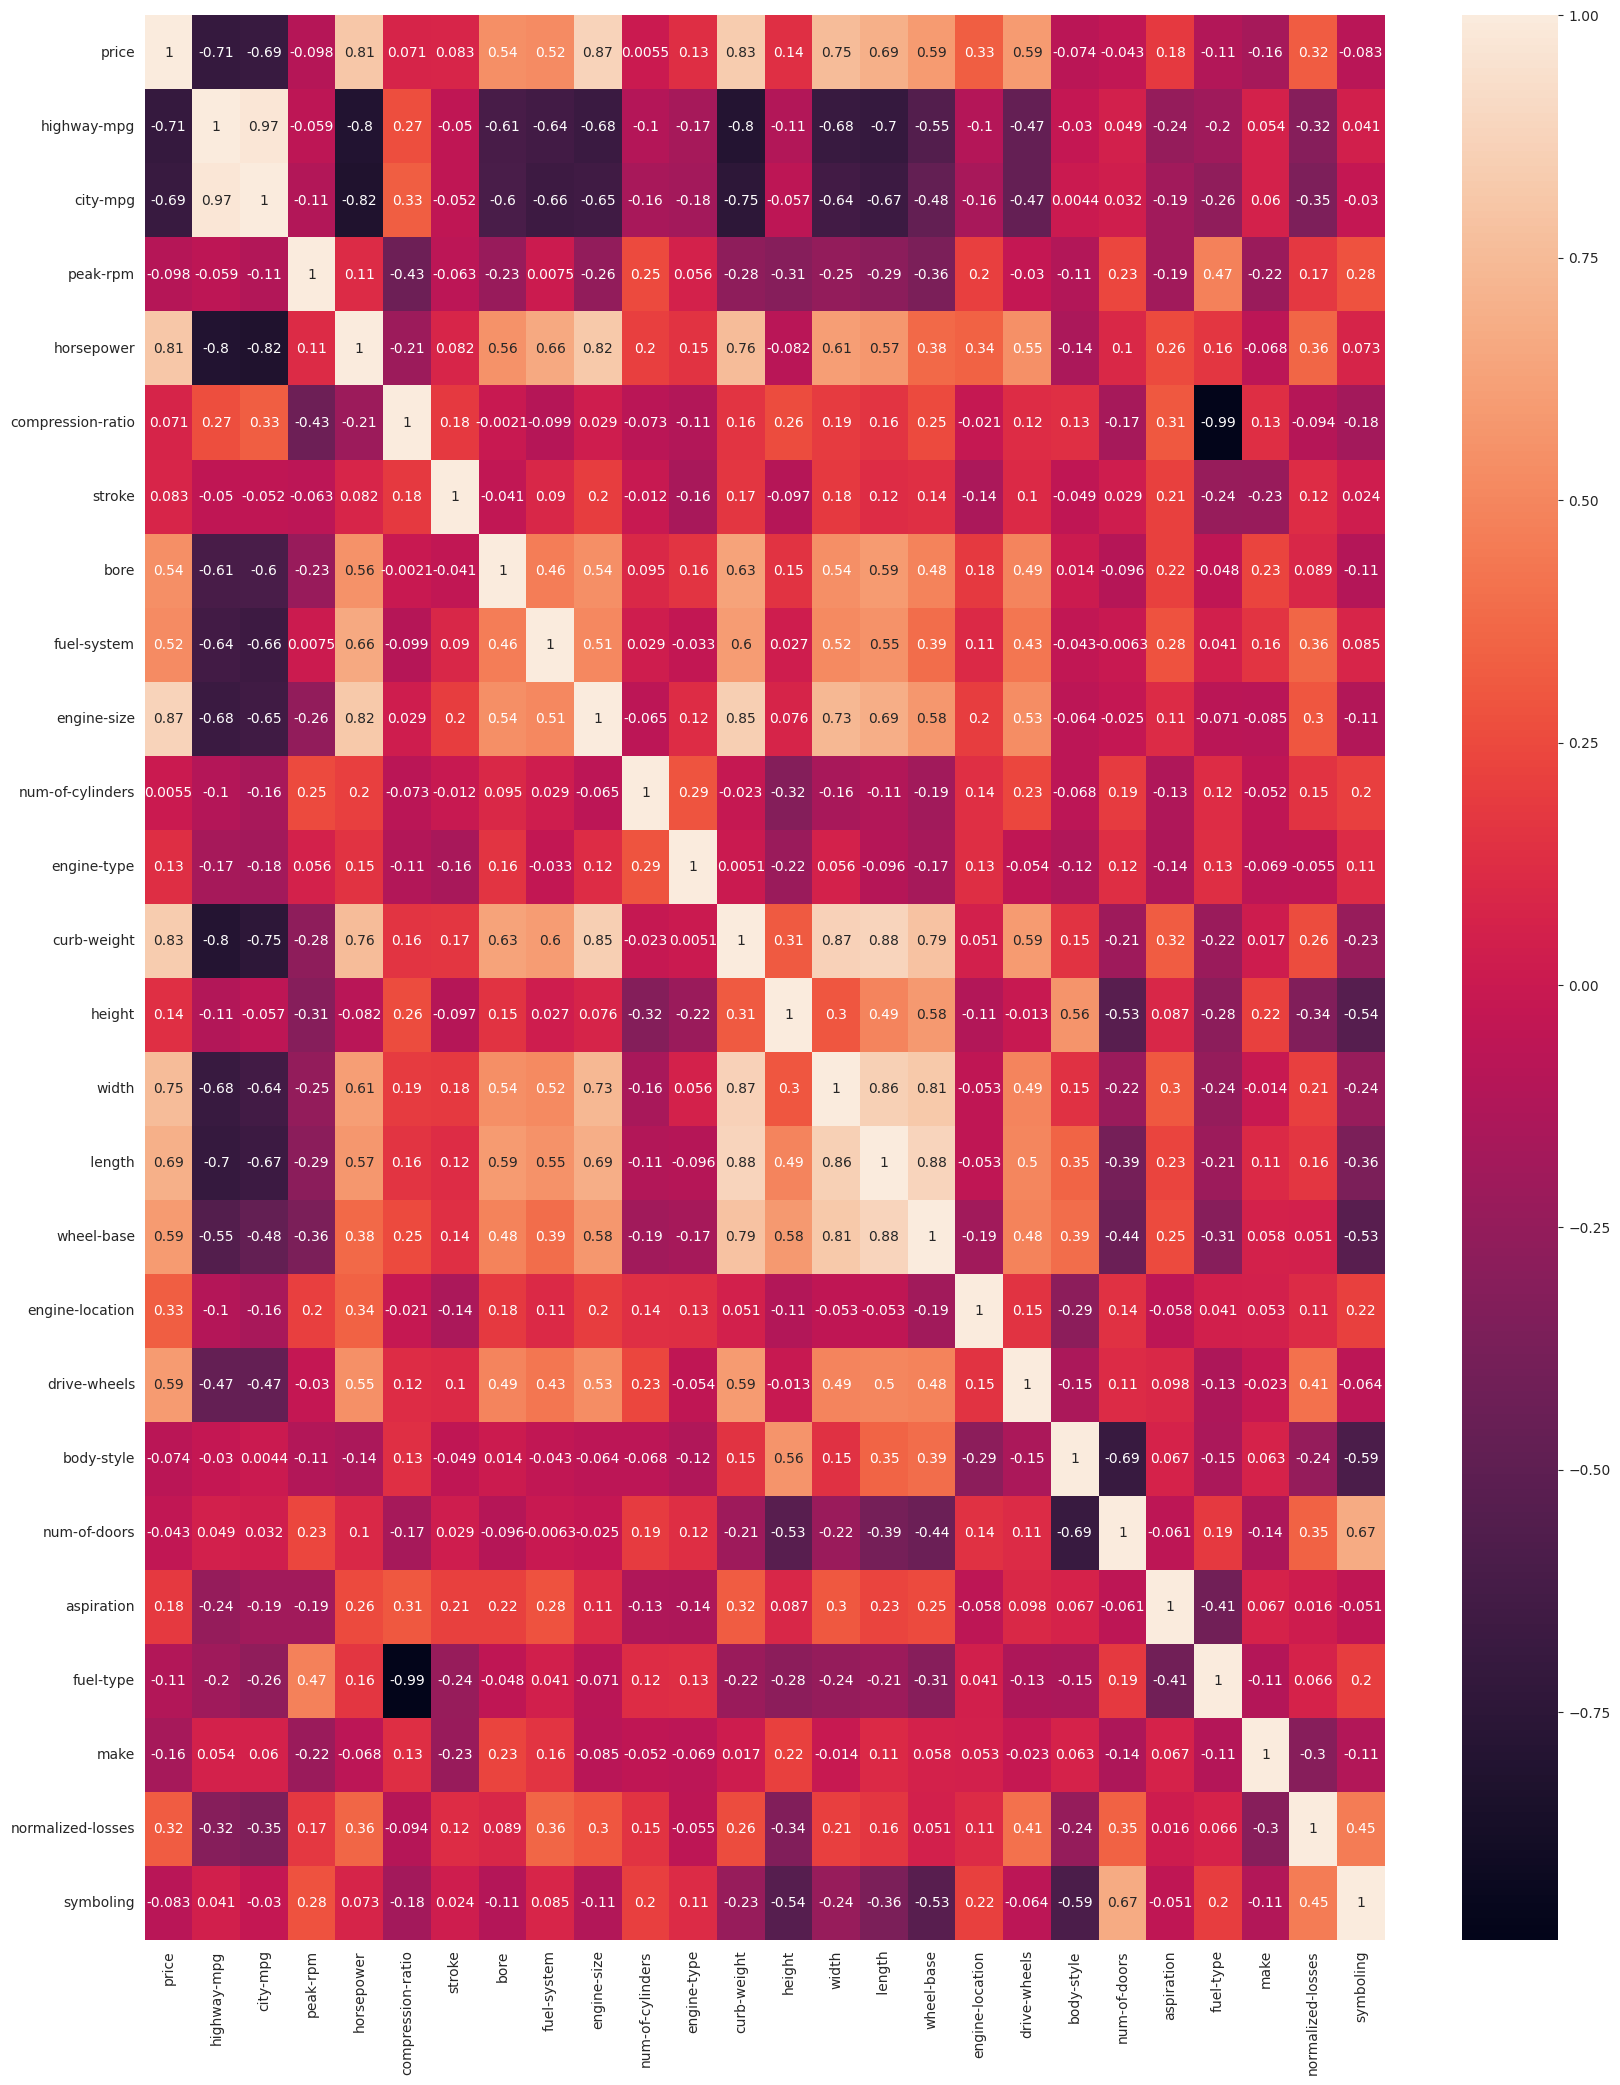

In [ ]:
plt.figure(figsize=(20,25))
sns.heatmap(res,annot=True)
plt.show()

#Feature Selection

#Checking Multicollinarity using Variance Inflance Factor(VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('price',axis=1)
y=df['price']
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data

feature         VIF
0           symboling    3.368329
1   normalized-losses    2.502661
2                make    1.643842
3           fuel-type  111.137189
4          aspiration    3.809642
5        num-of-doors    2.931974
6          body-style    2.962983
7        drive-wheels    3.024737
8     engine-location    1.864214
9          wheel-base   11.302121
10             length   12.930381
11              width    8.326757
12             height    3.300775
13        curb-weight   19.328970
14        engine-type    1.824513
15   num-of-cylinders    2.836565
16        engine-size   18.227408
17        fuel-system    2.721711
18               bore    2.555878
19             stroke    1.683615
20  compression-ratio  103.045728
21         horsepower   20.240654
22           peak-rpm    2.940012
23           city-mpg   32.038683
24        highway-mpg   28.541830

In [ ]:
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
print("Dropping features:", high_vif_features)

x_reduced = x.drop(columns=high_vif_features)

Dropping features: ['fuel-type', 'wheel-base', ' length', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg']


In [ ]:
res1=x_reduced.corr()

In [ ]:
res1[res1>0.8]

symboling  normalized-losses  make  aspiration  \
symboling                1.0                NaN   NaN         NaN   
normalized-losses        NaN                1.0   NaN         NaN   
make                     NaN                NaN   1.0         NaN   
aspiration               NaN                NaN   NaN         1.0   
num-of-doors             NaN                NaN   NaN         NaN   
body-style               NaN                NaN   NaN         NaN   
drive-wheels             NaN                NaN   NaN         NaN   
engine-location          NaN                NaN   NaN         NaN   
width                    NaN                NaN   NaN         NaN   
height                   NaN                NaN   NaN         NaN   
engine-type              NaN                NaN   NaN         NaN   
num-of-cylinders         NaN                NaN   NaN         NaN   
fuel-system              NaN                NaN   NaN         NaN   
bore                     NaN                NaN   NaN         NaN   
stroke                   NaN                NaN   NaN         NaN   
peak-rpm                 NaN                NaN   NaN         NaN   

                   num-of-doors  body-style  drive-wheels  engine-location  \
symboling                   NaN         NaN           NaN              NaN   
normalized-losses           NaN         NaN           NaN              NaN   
make                        NaN         NaN           NaN              NaN   
aspiration                  NaN         NaN           NaN              NaN   
num-of-doors                1.0         NaN           NaN              NaN   
body-style                  NaN         1.0           NaN              NaN   
drive-wheels                NaN         NaN           1.0              NaN   
engine-location             NaN         NaN           NaN              1.0   
width                       NaN         NaN           NaN              NaN   
height                      NaN         NaN           NaN              NaN   
engine-type                 NaN         NaN           NaN              NaN   
num-of-cylinders            NaN         NaN           NaN              NaN   
fuel-system                 NaN         NaN           NaN              NaN   
bore                        NaN         NaN           NaN              NaN   
stroke                      NaN         NaN           NaN              NaN   
peak-rpm                    NaN         NaN           NaN              NaN   

                   width  height  engine-type  num-of-cylinders  fuel-system  \
symboling            NaN     NaN          NaN               NaN          NaN   
normalized-losses    NaN     NaN          NaN               NaN          NaN   
make                 NaN     NaN          NaN               NaN          NaN   
aspiration           NaN     NaN          NaN               NaN          NaN   
num-of-doors         NaN     NaN          NaN               NaN          NaN   
body-style           NaN     NaN          NaN               NaN          NaN   
drive-wheels         NaN     NaN          NaN               NaN          NaN   
engine-location      NaN     NaN          NaN               NaN          NaN   
width                1.0     NaN          NaN               NaN          NaN   
height               NaN     1.0          NaN               NaN          NaN   
engine-type          NaN     NaN          1.0               NaN          NaN   
num-of-cylinders     NaN     NaN          NaN               1.0          NaN   
fuel-system          NaN     NaN          NaN               NaN          1.0   
bore                 NaN     NaN          NaN               NaN          NaN   
stroke               NaN     NaN          NaN               NaN          NaN   
peak-rpm             NaN     NaN          NaN               NaN          NaN   

                   bore  stroke  peak-rpm  
symboling           NaN     NaN       NaN  
normalized-losses   NaN     NaN       NaN  
make                NaN  

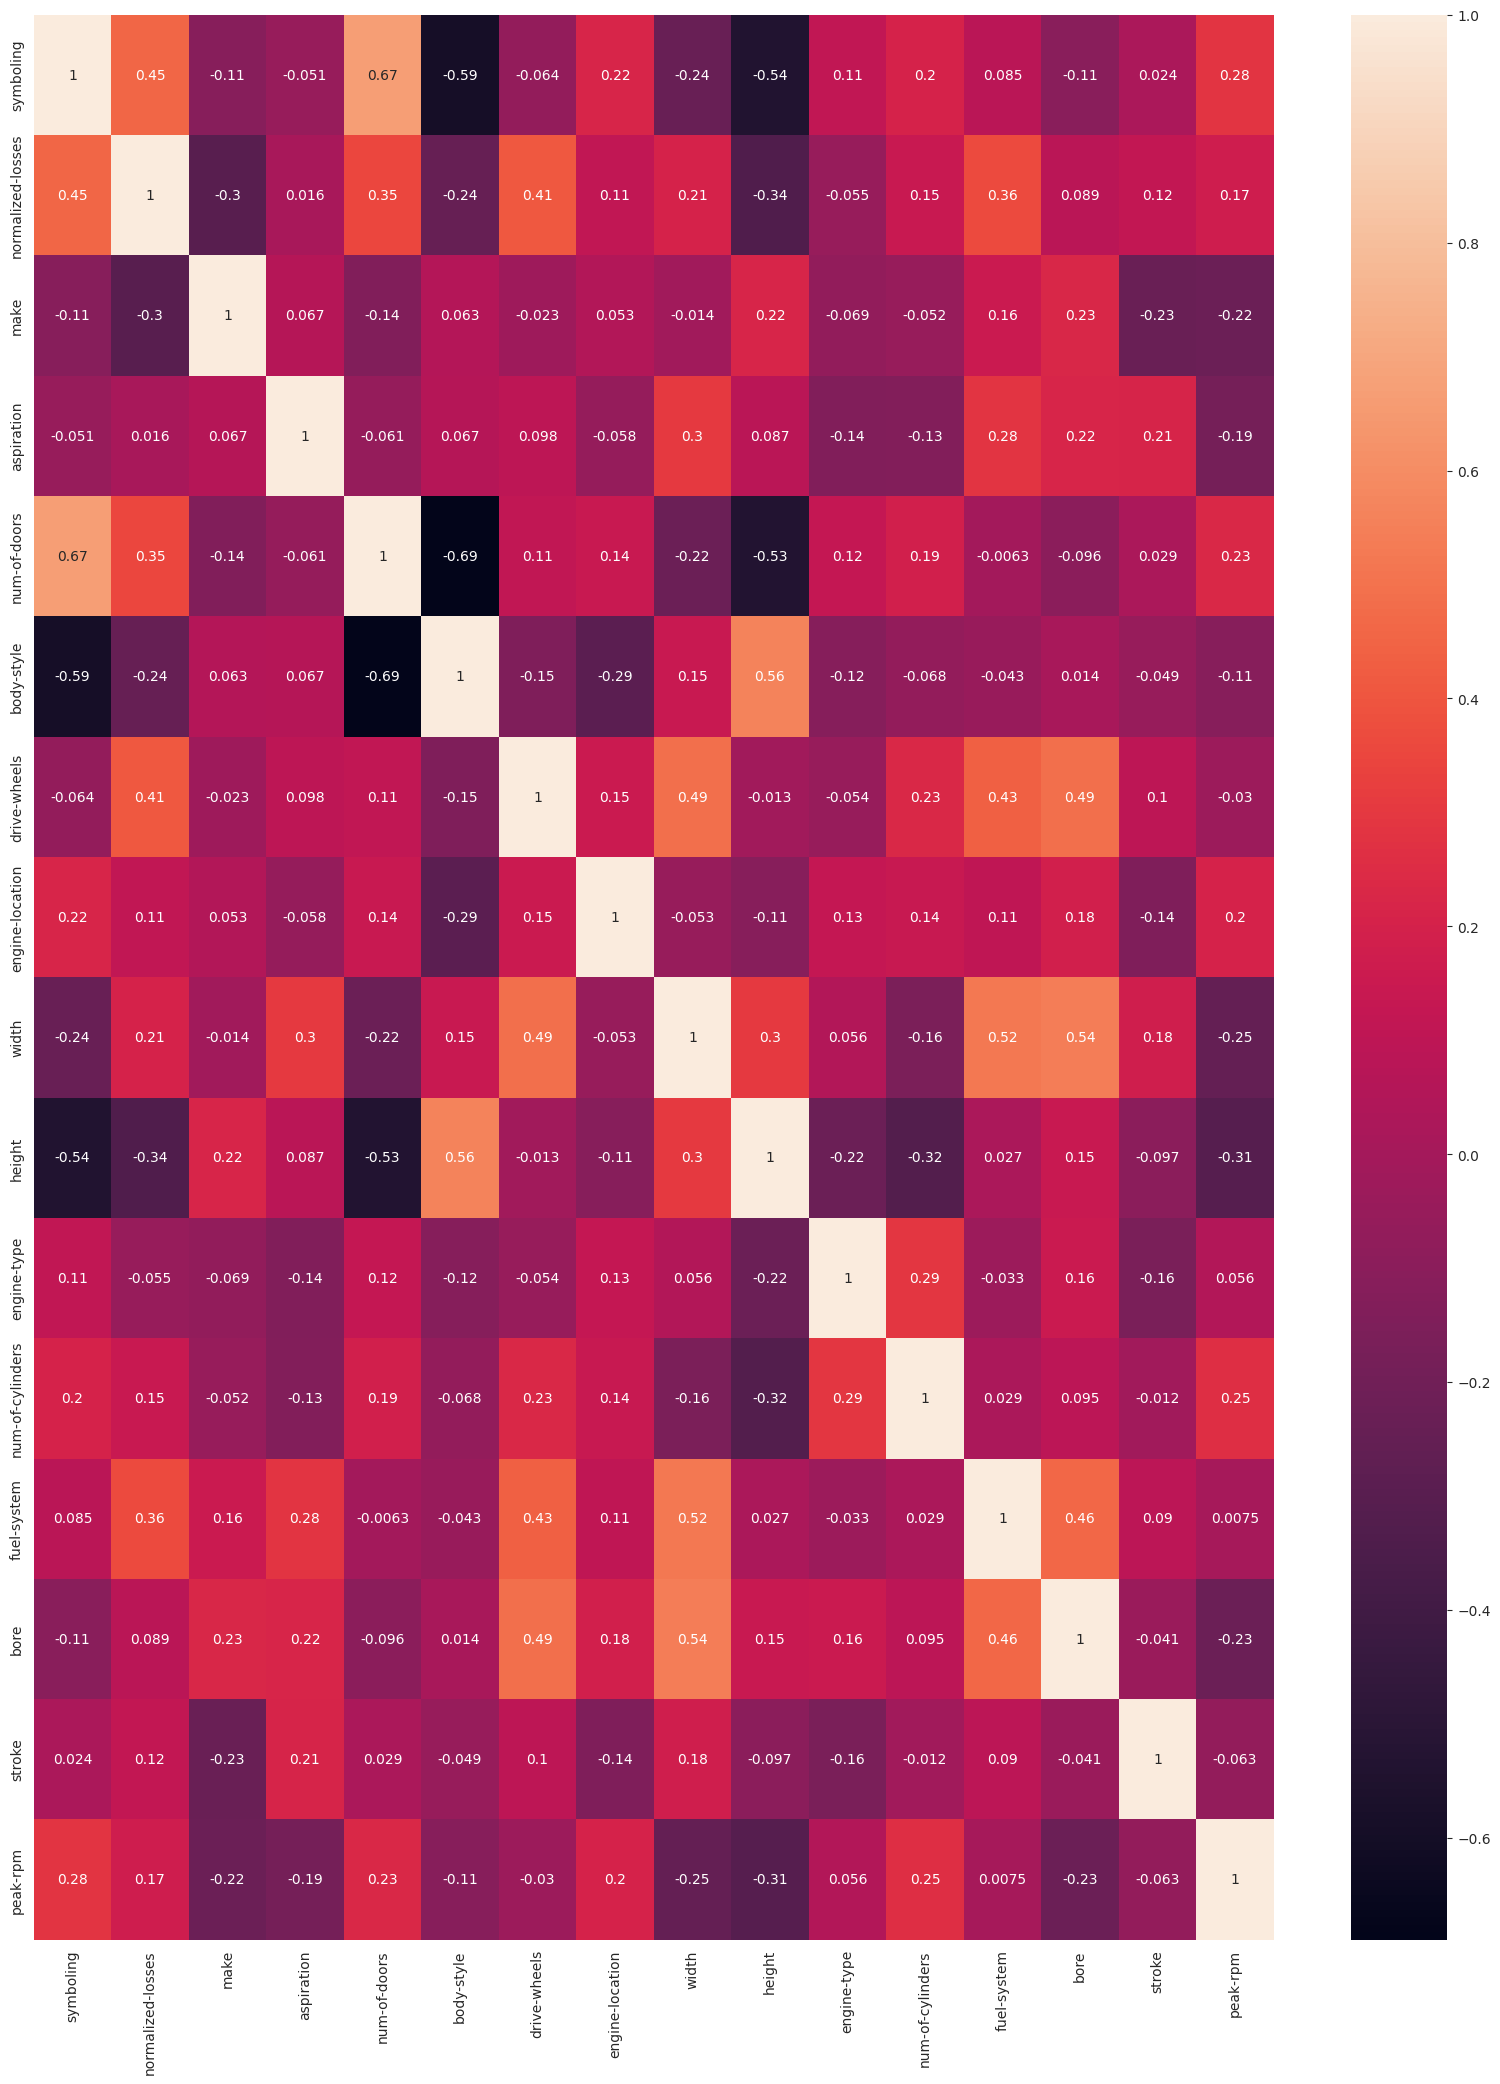

In [ ]:
plt.figure(figsize=(20,25))
sns.heatmap(res1,annot=True)
plt.show()

#Model Creation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.2,random_state=42)


In [ ]:
x_train

symboling  normalized-losses      make  aspiration  num-of-doors  \
79    1.742368           0.905161 -0.219640    2.134375      1.163160   
197  -1.469370          -0.962901  1.395357   -0.468521     -0.859727   
38   -0.666436          -1.245941 -1.188638   -0.468521     -0.859727   
24    0.136499           0.537210 -1.350137   -0.468521     -0.859727   
122   1.742368           0.905161  0.426359   -0.468521      1.163160   
195  -1.469370          -0.962901  1.395357   -0.468521     -0.859727   
29    0.939433           0.225866 -1.188638   -0.468521      1.163160   
19    0.136499          -0.311910 -1.350137   -0.468521      1.163160   
143  -0.666436          -1.245941  0.910858   -0.468521     -0.859727   
86    0.136499          -0.028870 -0.058140   -0.468521      1.163160   
114   0.136499          -0.283606  0.264859   -0.468521      1.163160   
173   1.742368           1.924105  1.072358   -0.468521      1.163160   
5     0.136499           0.820249 -1.834636   -0.468521     -0.859727   
126   0.939433           0.905161  0.587859   -0.468521      1.163160   
117   0.136499           0.707033  0.264859   -0.468521     -0.859727   
73    0.939433           0.905161 -0.219640   -0.468521      1.163160   
140  -0.666436          -0.764774  0.910858    2.134375     -0.859727   
98   -0.666436          -0.594950 -0.058140   -0.468521     -0.859727   
172  -1.469370          -1.812021  1.072358   -0.468521     -0.859727   
96   -0.666436          -0.651558 -0.058140   -0.468521     -0.859727   
169  -1.469370          -1.812021  1.072358    2.134375     -0.859727   
97   -0.666436          -0.028870 -0.058140   -0.468521     -0.859727   
31    0.136499          -0.793078 -1.188638   -0.468521      1.163160   
12    0.136499           0.905161 -1.673137   -0.468521     -0.859727   
35   -0.666436          -0.651558 -1.188638   -0.468521      1.163160   
119  -1.469370          -1.557285  0.264859   -0.468521     -0.859727   
42    0.939433           0.905161 -1.027138   -0.468521      1.163160   
189  -2.272305          -0.736470  1.395357   -0.468521     -0.859727   
90    0.136499          -0.028870 -0.058140   -0.468521      1.163160   
136  -0.666436          -0.764774  0.910858   -0.468521     -0.859727   
51    1.742368           0.593818 -0.704139   -0.468521      1.163160   
127   1.742368           0.593818  0.749359   -0.468521      1.163160   
162   0.939433           0.140954  1.072358   -0.468521      1.163160   
41   -0.666436           0.905161 -1.027138   -0.468521     -0.859727   
118   0.136499           0.707033  0.264859   -0.468521     -0.859727   
113  -0.666436           0.905161  0.103360    2.134375     -0.859727   
26   -1.469370          -0.538342 -1.350137   -0.468521     -0.859727   
139  -0.666436          -0.764774  0.910858   -0.468521     -0.859727   
100   1.742368           1.839193 -0.058140   -0.468521      1.163160   
111  -0.666436           0.905161  0.103360   -0.468521     -0.859727   
2     0.939433           0.990073 -1.834636   -0.468521     -0.859727   
77    1.742368           0.678729 -0.219640   -0.468521      1.163160   
46    0.136499          -0.708166 -0.704139   -0.468521      1.163160   
187  -0.666436           0.905161  1.233858    2.134375     -0.859727   
191  -2.272305          -0.736470  1.395357   -0.468521     -0.859727   
85    0.136499          -0.028870 -0.058140   -0.468521      1.163160   
161   0.136499           1.103289  1.072358   -0.468521      1.163160   
36   -0.666436          -0.651558 -1.188638   -0.468521      1.163160   
190  -1.469370          -1.557285  1.395357   -0.468521     -0.859727   
61   -0.666436          -0.311910 -0.704139   -0.468521     -0.859727   
22    0.136499           0.537210 -1.350137   -0.468521     -0.859727   
141  -0.666436          -1.132725  0.910858   -0.468521     -0.859727   
101   1.742368           1.839193 -0.058140    2.134375      1.163160   
33   -0.666436          -0.538342 -1.188638   -0.468521     -0.

In [ ]:
y_train

79     0.209299
197    1.041811
38    -0.366261
24    -0.704248
122    2.431384
195    0.457945
29    -0.799126
19    -0.960570
143   -0.653412
86    -0.768423
114   -0.960570
173    0.421831
5      0.566791
126   -0.416594
117   -0.819637
73    -0.882931
140   -0.244958
98     0.150158
172   -0.246342
96    -0.460132
169   -0.315550
97     0.036908
31    -0.840148
12     1.429376
35    -0.668260
119   -0.539155
42    -0.271509
189   -0.033433
90    -0.743257
136   -0.765026
51    -0.284469
127   -0.170591
162   -0.598549
41    -0.807935
118   -0.704248
113    0.622157
26    -0.539155
139   -0.499896
100    0.502490
111    0.430891
2      0.093659
77    -0.592257
46    -1.008009
187    0.080446
191    0.349729
85    -0.969756
161   -0.461516
36    -0.517261
190    0.026338
61     0.638516
22    -0.877898
141   -0.722620
101    0.817073
33    -0.743760
11     0.993994
194    0.722824
159   -0.625099
6      0.719049
27    -0.030413
120   -0.055579
4      0.257242
32    -0.764648
142   -0.378467
145   -0.988757
109    0.439070
144   -0.190221
10     0.977007
62     0.646569
112    0.596991
146   -0.864182
166   -0.208466
0      0.414533
198    1.165756
153   -0.667883
70     4.051107
123    2.620134
64     1.892819
44     2.811652
163   -0.448807
28    -0.846440
40    -0.359969
108    0.464866
155   -0.688016
156   -0.609999
25    -0.584833
23    -0.819637
184   -0.202678
147   -0.845307
81    -0.782265
39    -0.032803
168   -0.535758
47    -0.894760
94    -0.623715
154   -0.681724
43     2.396403
138   -0.408415
3      0.534074
105   -0.096349
53     0.055280
133   -1.017698
180   -0.630510
178   -0.658193
185   -0.405898
49    -0.819260
80     0.161483
34    -0.743760
7      1.342551
110    0.486887
91    -0.680340
83    -0.494107
176    0.320158
181   -0.592760
89    -0.736965
8      0.405725
13     2.208912
59    -0.303344
171   -0.290384
131    0.622157
17    -0.869593
72    -0.983598
175    0.312608
134   -0.774212
167    0.561632
183   -0.404011
63     1.553573
54     0.306946
107    0.298767
50    -0.731177
196    0.734778
58    -0.372553
48    -0.806676
88    -0.799881
21    -0.660458
57    -0.328511
160   -0.491716
192    0.416420
129    0.230817
37    -0.548719
157   -0.496750
193    0.656132
1      0.414533
52    -0.171220
149   -0.667883
130    0.289958
151   -0.788682
103   -0.164299
99     0.036908
116   -0.877898
87    -0.825048
74    -0.822531
121    1.108880
199    1.185260
20    -0.859275
188   -0.115224
71     0.414910
106    0.082334
14     3.537079
92    -0.718090
179   -0.655677
102    0.653490
Name: price, dtype: float64

In [ ]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=l_model.predict(x_test)
y_pred

array([-0.30762909,  1.97009164, -0.74069115, -0.82007342, -0.11045562,
       -0.62767236,  1.83614226,  0.16806349,  0.37668452,  1.66692685,
        1.65748565, -0.76553297,  0.10700128,  0.13681001, -0.06387009,
       -0.68383589,  0.08354271, -0.82080823, -0.48677738,  1.34827077,
        2.65686788, -1.29877514, -1.17070584, -1.09216774,  1.49128291,
        0.21465136,  0.01870849,  1.78601793,  0.09592189, -0.15705475,
        0.41579072, -0.73836427,  0.11597641, -0.45942205, -1.32800641,
        0.92722442, -1.04479487, -0.5108185 , -0.02410737, -0.29892734])

In [ ]:
from sklearn.metrics import r2_score
r2_on_test=r2_score(y_test,y_pred)
r2_on_test

0.8023497528262893

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.447121013433586
Mean Squared Error: 0.3506642157164853


In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor(random_state=42,criterion='squared_error',splitter='best')
d_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred=d_model.predict(x_test)
y_pred

array([-0.46013232,  2.81165184, -0.90314841, -0.6250994 ,  0.28995827,
       -0.66045847,  4.05110701, -0.24634203,  0.42183127,  2.81165184,
        1.55357338, -0.65567682, -0.52367799,  0.18539104,  0.53407431,
       -0.7684232 , -0.37255254, -0.60999944, -0.78226483,  2.39640289,
        2.52575923, -0.86959294, -0.73834911, -0.73696494,  2.39640289,
       -0.37255254, -0.40841495,  1.55357338, -0.4165941 ,  0.62215742,
        0.40572464, -0.76502571, -0.32851099, -0.20267797, -0.66788262,
        0.53092849, -0.77421152, -0.76502571, -0.20846629, -0.66045847])

In [ ]:
from sklearn.metrics import r2_score
r2_on_test=r2_score(y_test,y_pred)
r2_on_test

0.9401084076189737

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_model=RandomForestRegressor(n_estimators=100,random_state=42)
r_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred=r_model.predict(x_test)
y_pred

array([-0.49682774,  2.30624354, -0.87296481, -0.61844849,  0.1747506 ,
       -0.61629192,  2.25893159, -0.30457189,  0.48797455,  2.18962402,
        1.67976376, -0.6297311 , -0.45278514,  0.16110419,  0.20690408,
       -0.68190105, -0.34965345, -0.6101173 , -0.72690292,  2.53803047,
        2.15011012, -0.68949486, -0.71982355, -0.73758971,  2.12863024,
       -0.34328756, -0.39998749,  2.00803818, -0.21909184,  0.41230445,
        0.50181954, -0.67730982, -0.33474098, -0.57702154, -0.71086886,
        0.48992737, -0.80096718, -0.69571059, -0.2773238 , -0.35178129])

In [ ]:
from sklearn.metrics import r2_score
r2_on_test=r2_score(y_test,y_pred)
r2_on_test

0.9280323093983263

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.2,random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, random_state=42)

In [ ]:
y_pred=gbr.predict(x_test)
y_pred

array([-0.53171215,  3.40794847, -0.76805745, -0.59337565,  0.19165559,
       -0.65873754,  3.29837867, -0.25266269,  0.41511361,  2.93029031,
        1.7056814 , -0.45119494, -0.43572583,  0.11069945,  0.11853494,
       -0.7556227 , -0.37277829, -0.63917034, -0.7144027 ,  2.61148969,
        2.69956406, -0.60455909, -0.69661625, -0.7176242 ,  2.26799974,
       -0.37516449, -0.41893936,  1.85793092, -0.27894695,  0.70933761,
        0.47865077, -0.66472196, -0.3413664 , -0.60642669, -0.65227887,
        0.50324775, -0.79999047, -0.71106358, -0.35688758, -0.30606659])

In [ ]:
from sklearn.metrics import r2_score
r2_on_test=r2_score(y_test,y_pred)
r2_on_test

0.9660455329846692

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)
y_pred

array([-0.4796037 ,  2.493416  , -0.8357571 , -0.60827315,  0.26916984,
       -0.6727965 ,  2.414759  , -0.24786042,  0.41752416,  1.8151592 ,
        1.6206658 , -0.52814835, -0.5152803 ,  0.1863574 ,  0.06433103,
       -0.7160867 , -0.3770789 , -0.6075901 , -0.77015173,  1.9916688 ,
        2.5810816 , -0.6211496 , -0.68627006, -0.7345272 ,  1.8893372 ,
       -0.36469138, -0.45237145,  1.6737918 , -0.23237069,  0.6899955 ,
        0.39443874, -0.69253975, -0.3271546 , -0.5537845 , -0.63175213,
        0.5386087 , -0.7508748 , -0.7338461 , -0.22085527, -0.25616062],
      dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
r2_on_test=r2_score(y_test,y_pred)
r2_on_test

0.9179594291582713

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.25334389030732496
Mean Squared Error: 0.14555353632248844


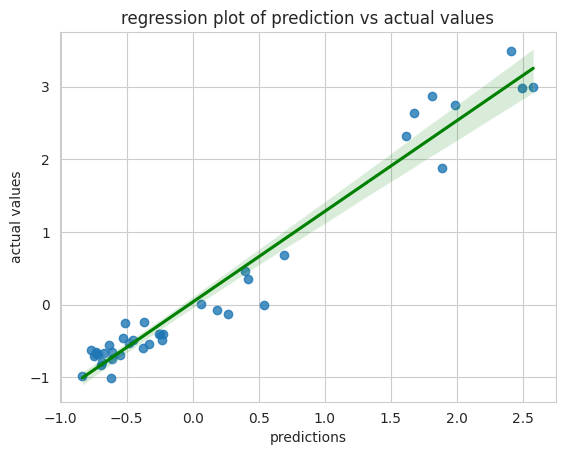

In [ ]:
sns.regplot(x=y_pred,y=y_test,line_kws={'color':'green'})
plt.xlabel('predictions')
plt.ylabel('actual values')
plt.title('regression plot of prediction vs actual values')
plt.show()

In [ ]:
results=[]
names=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','XGBoost']
models=[l_model,d_model,r_model,gbr,xgb]

for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  r2_on_test=r2_score(y_test,y_pred)
  results.append(r2_on_test)

In [ ]:
print(results)

[0.8023497528262893, 0.9401084076189737, 0.9280323093983263, 0.9660455329846692, 0.9179594291582713]


In [ ]:
results_df = pd.DataFrame({'Model': names, 'R2 Score': results}).sort_values(by="R2 Score", ascending=False)
print("Model Comparison Results:")
display(results_df)

Model Comparison Results:


Model  R2 Score
3  Gradient Boosting  0.966046
1      Decision Tree  0.940108
2      Random Forest  0.928032
4            XGBoost  0.917959
0  Linear Regression  0.802350

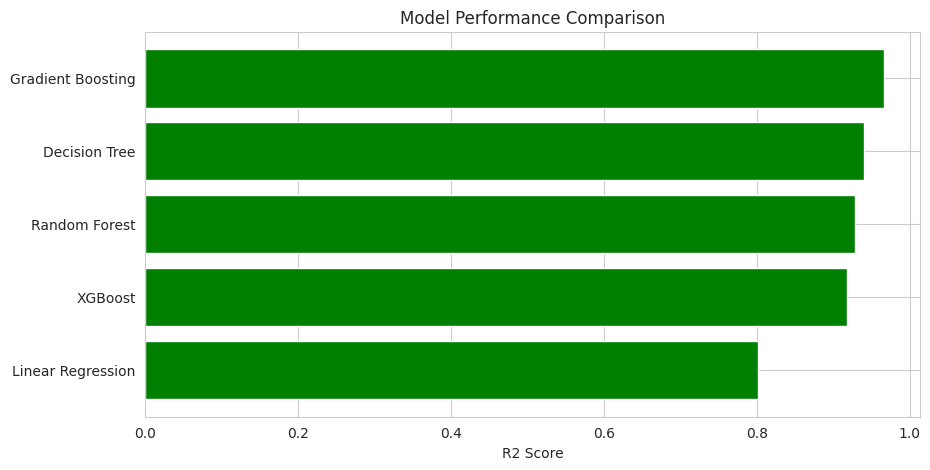

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["R2 Score"], color='green')
plt.xlabel("R2 Score")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()